# Ernesto Antonio Reyes Ramírez

# Procesamiento de Lenguaje Natural 

# Proyecto 1: Minería de Texto en Turismo

### 1.Procesamiento de los datos

In [338]:
import os
import time
import shutil
import random
from typing import Tuple
from argparse import Namespace
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
from wordcloud import WordCloud
%matplotlib inline

#Preprocesing
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import TweetTokenizer
from nltk import FreqDist
import pandas as pd
import numpy as np

#Pytorch
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.nn.functional as F


#Scikit-learn
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing

In [30]:
seed = 1111
random.seed(seed) 
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False

In [12]:
ruta = "/Users/ernes/OneDrive/Documentos/Maestría-CIMAT/Segundo/NLP/Proyecto1/opiniones"
dataframes = {}
nombre_lugares = []

for archivo in os.listdir(ruta):
    if archivo.endswith('.csv'):
        ruta_archivo = ruta + "/" + archivo
        nombre_archivo = os.path.splitext(archivo)[0]
        nombre_lugares.append(nombre_archivo)
        df = pd.read_csv(ruta_archivo)
        dataframes[nombre_archivo] = df

# Construya estadísticas básicas respecto a la opinión de cada lugar turístico. Pre-procese y limpie el texto según sus intuiciones y argumente brevemente sobre ello.

# Considere scores de 4 a 5 como positivos, calificaciones de 3 como neutros y las de 2 a 1 como negativos.

# (a) Promedio de califiaciones por lugar 

In [37]:
print("Lugares junto con promedios y desviación estandar de califiaciones \n")

for nombre,data in dataframes.items():
    print(nombre)
    media = np.mean(data["Escala"])
    ds = np.std(data["Escala"])
    print("Media: ",media)
    print("Desviación Estandar: ",ds)
    print("\n")

Lugares junto con promedios y desviación estandar de califiaciones 

Alhondiga-930
Media:  4.45483870967742
Desviación Estandar:  0.7453102304254413


Basilica-Colegiata-560
Media:  4.5
Desviación Estandar:  0.6681531047810609


Callejon-Beso-1360
Media:  3.9955882352941177
Desviación Estandar:  0.9708901045719361


Casa-Diego-Rivera-698
Media:  4.243553008595988
Desviación Estandar:  0.8034631243409769


Jardin-Union-1134
Media:  4.591710758377425
Desviación Estandar:  0.6071023503347351


Mercado-Hidalgo-600
Media:  3.9483333333333333
Desviación Estandar:  0.9499108145271108


Monumento-Pipila-1620
Media:  4.377777777777778
Desviación Estandar:  0.7677126520055403


Museo-Momias-1650
Media:  3.6751515151515153
Desviación Estandar:  1.1361501213551304


Teatro-Juarez-1010
Media:  4.702970297029703
Desviación Estandar:  0.5178889833909713


Universidad-Guanajuato-900
Media:  4.6033333333333335
Desviación Estandar:  0.6122726335365481




# (b) Longitud promedio de opiniones y desviaciones estandar

In [44]:
print("Longitud promedio de opiniones y desviaciones estandar")

for nombre,data in dataframes.items():
    print(nombre)
    dat = data["Opinión"].dropna()
    media = np.mean([len(opinion) for opinion in dat])
    ds = np.std([len(opinion) for opinion in dat])
    print("Media: ",media)
    print("Desviación Estandar: ",ds)
    print("\n")

Longitud promedio de opiniones y desviaciones estandar
Alhondiga-930
Media:  271.7881720430108
Desviación Estandar:  193.66821553771234


Basilica-Colegiata-560
Media:  227.18928571428572
Desviación Estandar:  164.0438962144099


Callejon-Beso-1360
Media:  251.1169117647059
Desviación Estandar:  179.93977426086497


Casa-Diego-Rivera-698
Media:  277.1618911174785
Desviación Estandar:  166.72668086477037


Jardin-Union-1134
Media:  248.66666666666666
Desviación Estandar:  203.01561177490422


Mercado-Hidalgo-600
Media:  263.935
Desviación Estandar:  187.98388434916436


Monumento-Pipila-1620
Media:  264.4327160493827
Desviación Estandar:  199.16532568283938


Museo-Momias-1650
Media:  327.65575757575755
Desviación Estandar:  259.9876272933737


Teatro-Juarez-1010
Media:  239.88811881188118
Desviación Estandar:  151.62908873928734


Universidad-Guanajuato-900
Media:  208.56666666666666
Desviación Estandar:  115.25372493377866




# (c) Histogramas de edades de opiniones por lugar

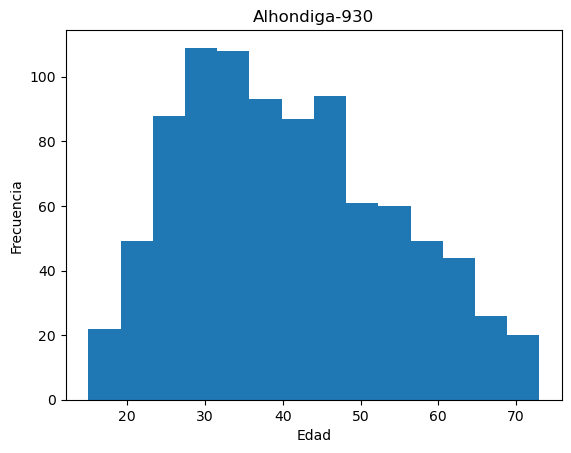

In [51]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[0]]["Edad"],bins="auto")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[0])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

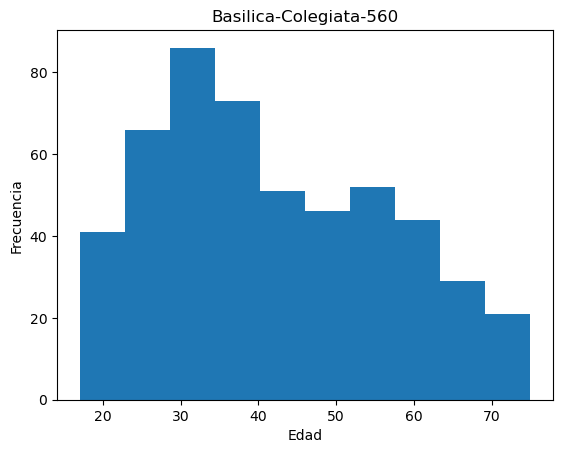

In [52]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[1]]["Edad"],bins="auto")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[1])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

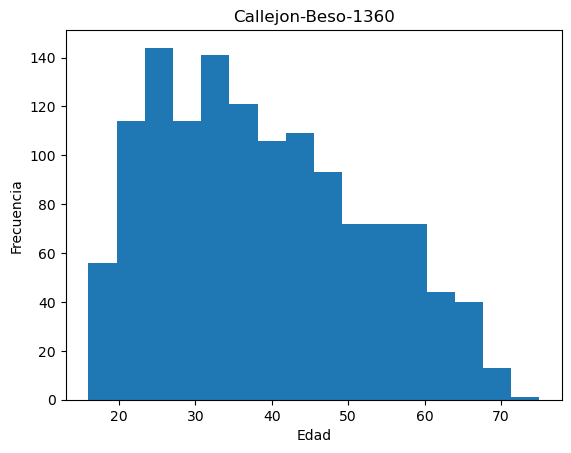

In [53]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[2]]["Edad"],bins="auto")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[2])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

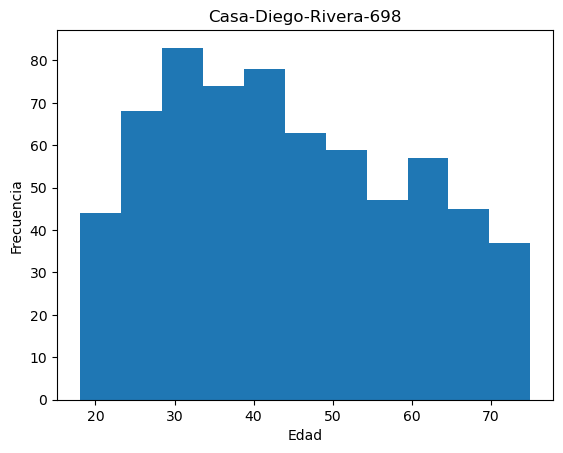

In [54]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[3]]["Edad"],bins="auto")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[3])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

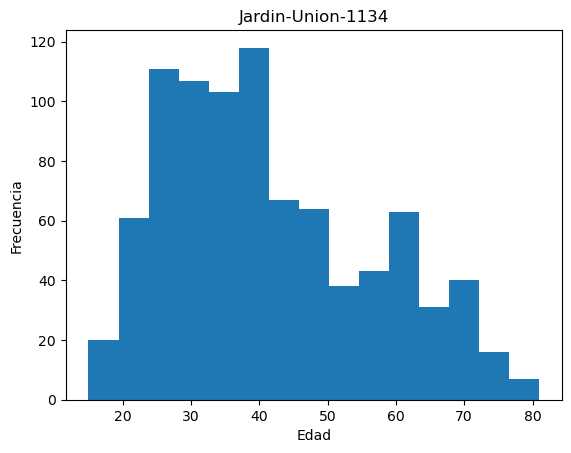

In [55]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[4]]["Edad"],bins="auto")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[4])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

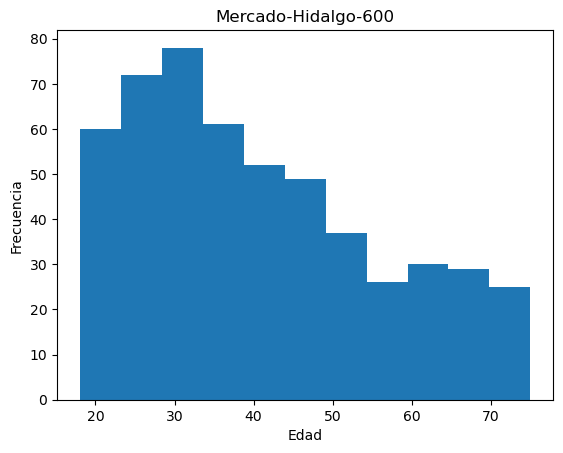

In [56]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[5]]["Edad"],bins="auto")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[5])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

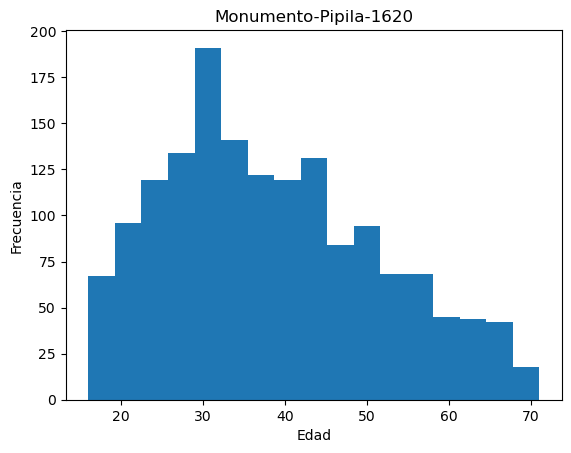

In [57]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[6]]["Edad"],bins="auto")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[6])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

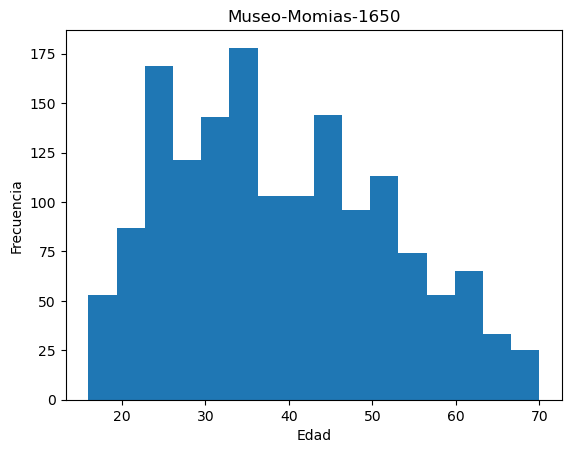

In [58]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[7]]["Edad"],bins="auto")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[7])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

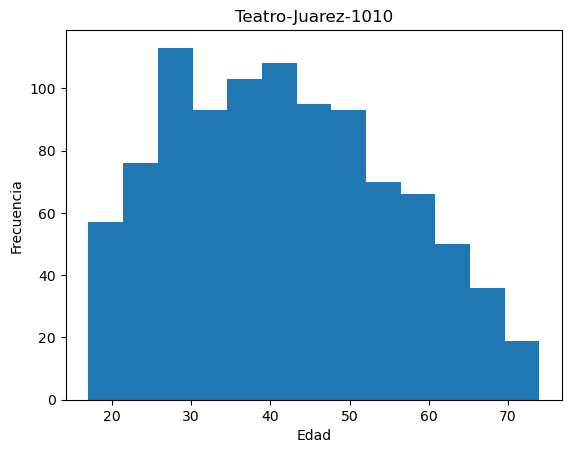

In [59]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[8]]["Edad"],bins="auto")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[8])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

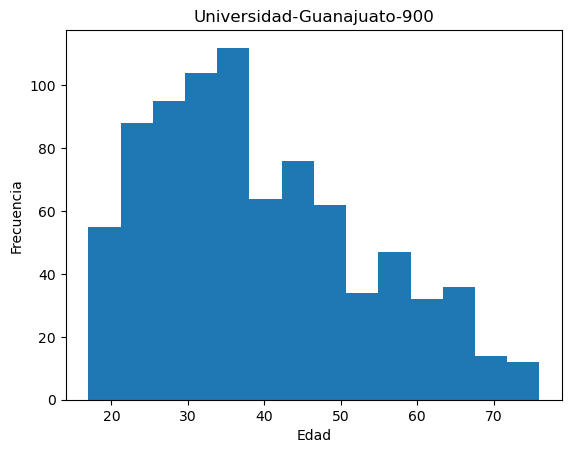

In [60]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[9]]["Edad"],bins="auto")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[9])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

# (d) Histograma de tipo de visitantes (nacional o internacional) por lugar

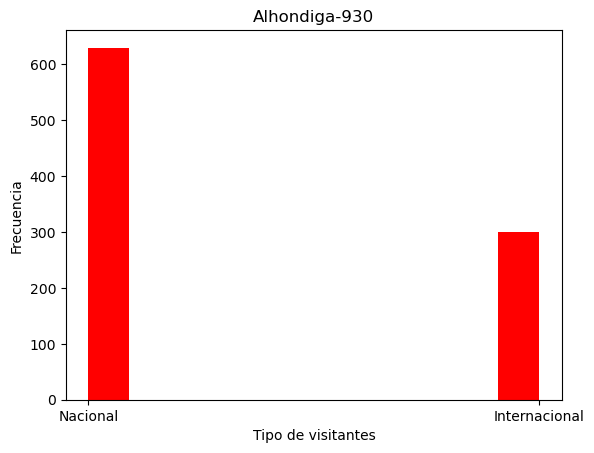

In [62]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[0]]["Nacional ó Internacional"],bins="auto",color="red")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[0])
plt.xlabel("Tipo de visitantes")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

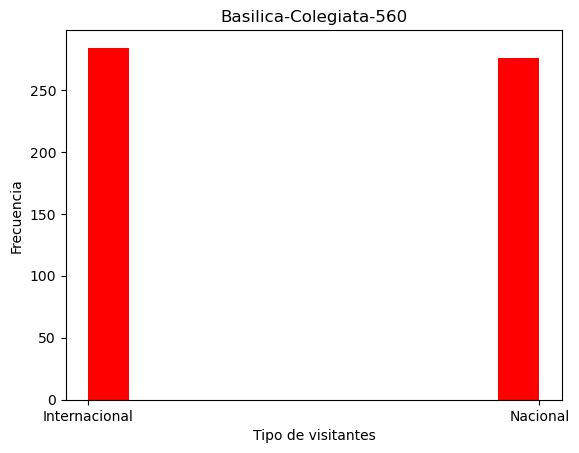

In [63]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[1]]["Nacional ó Internacional"],bins="auto",color="red")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[1])
plt.xlabel("Tipo de visitantes")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

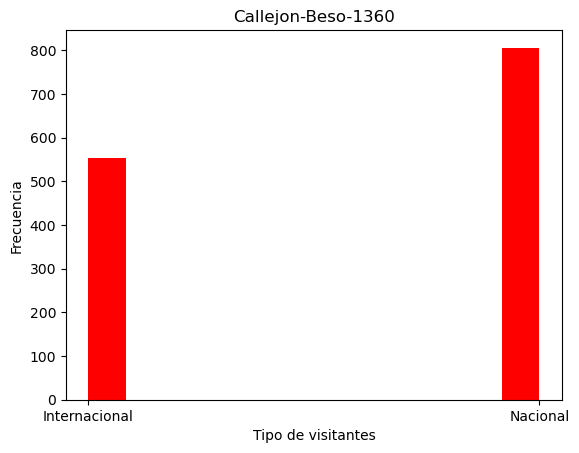

In [65]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[2]]["Nacional ó Internacional"].dropna(),bins="auto",color="red")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[2])
plt.xlabel("Tipo de visitantes")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

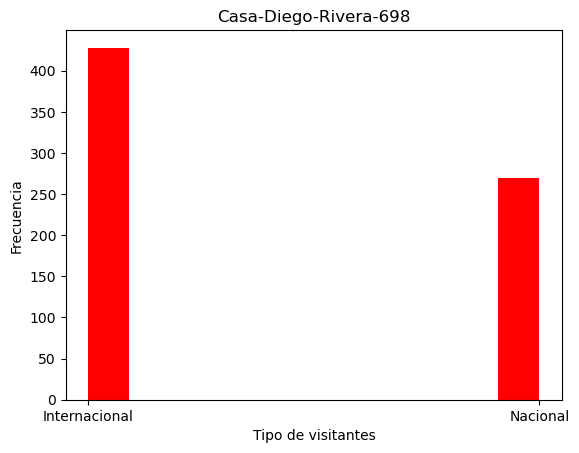

In [66]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[3]]["Nacional ó Internacional"].dropna(),bins="auto",color="red")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[3])
plt.xlabel("Tipo de visitantes")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

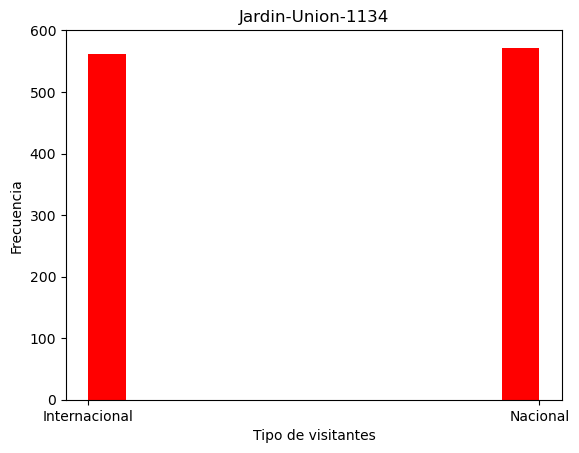

In [67]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[4]]["Nacional ó Internacional"].dropna(),bins="auto",color="red")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[4])
plt.xlabel("Tipo de visitantes")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

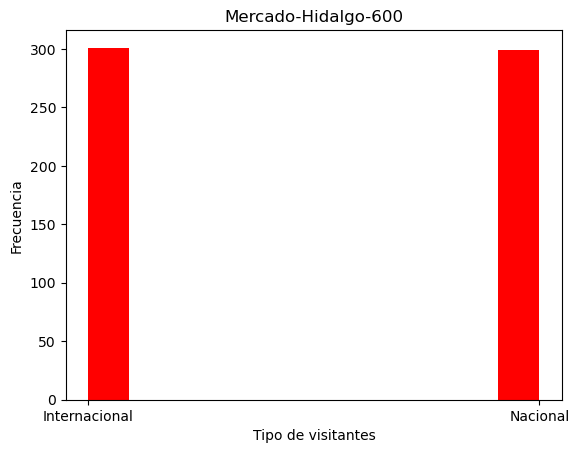

In [68]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[5]]["Nacional ó Internacional"].dropna(),bins="auto",color="red")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[5])
plt.xlabel("Tipo de visitantes")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

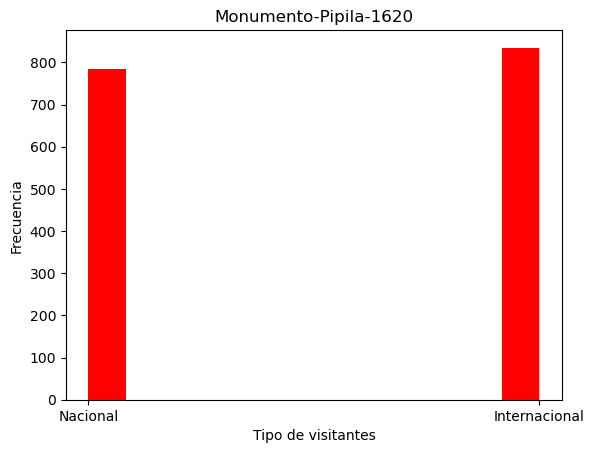

In [69]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[6]]["Nacional ó Internacional"].dropna(),bins="auto",color="red")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[6])
plt.xlabel("Tipo de visitantes")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

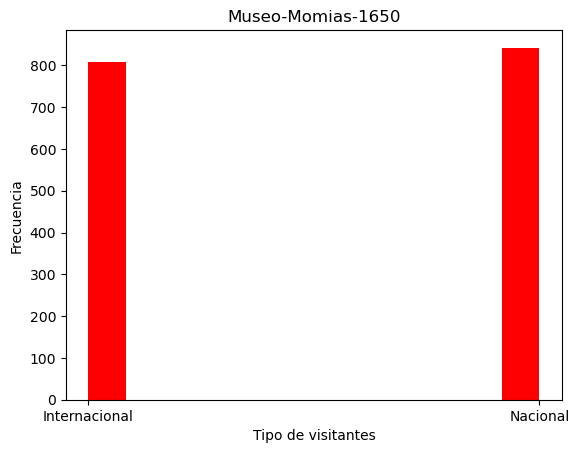

In [70]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[7]]["Nacional ó Internacional"].dropna(),bins="auto",color="red")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[7])
plt.xlabel("Tipo de visitantes")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

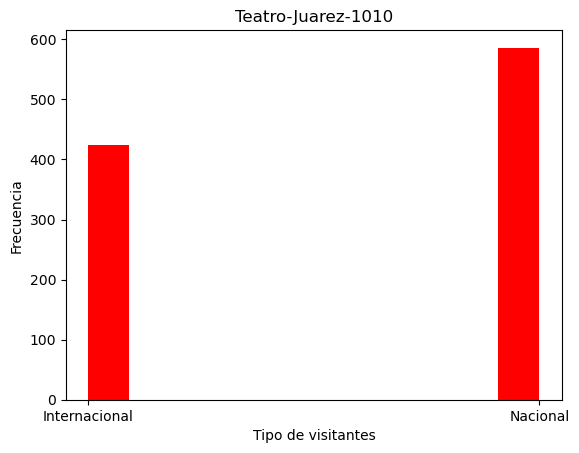

In [71]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[8]]["Nacional ó Internacional"].dropna(),bins="auto",color="red")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[8])
plt.xlabel("Tipo de visitantes")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

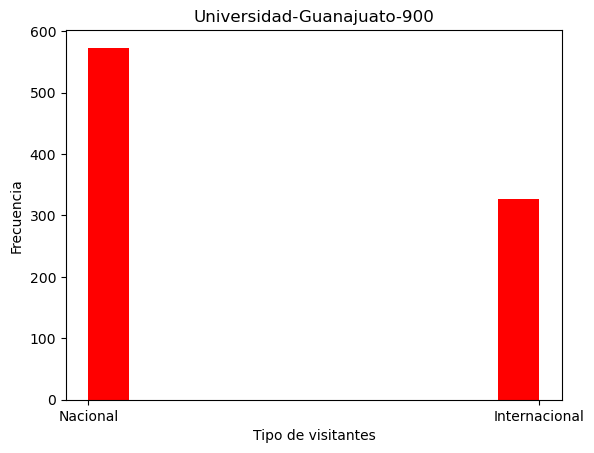

In [72]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[9]]["Nacional ó Internacional"].dropna(),bins="auto",color="red")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[9])
plt.xlabel("Tipo de visitantes")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

# (e) Sugiere dos más interesantes para ti.

Vamos a sugerir hacer un análisis de género ya que sería interesante ver por cual optan más desde este rubro.

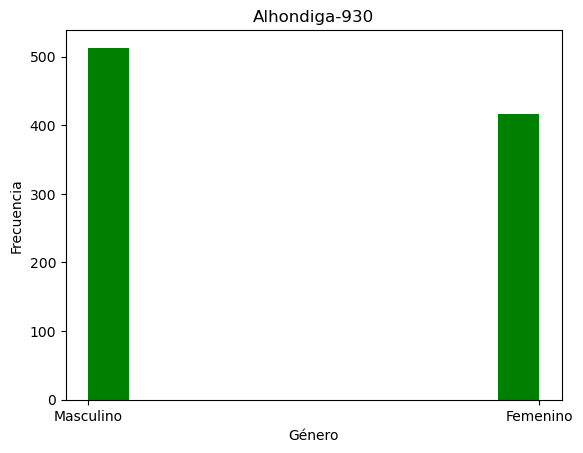

In [78]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[0]]["Género"].dropna(),bins="auto",color="green")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[0])
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

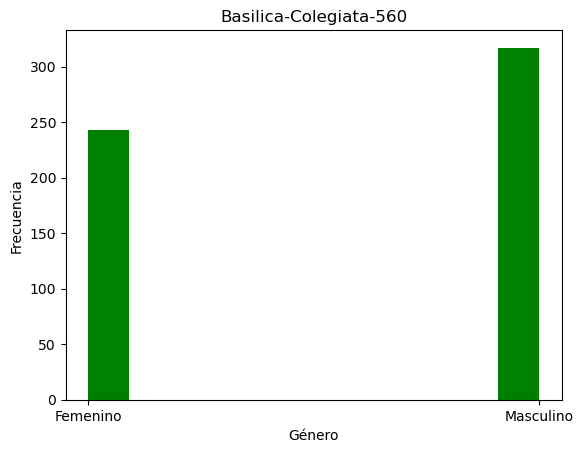

In [80]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[1]]["Género"].dropna(),bins="auto",color="green")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[1])
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

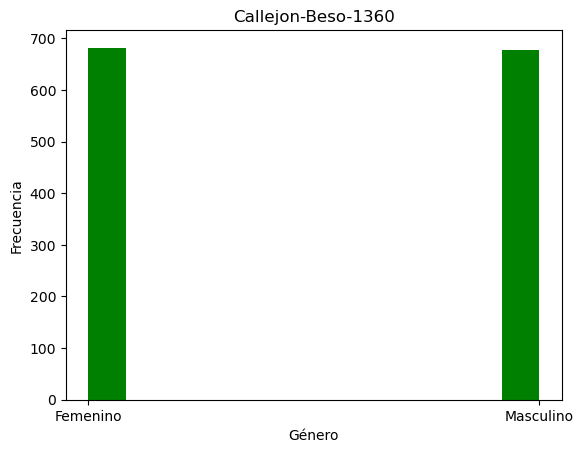

In [81]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[2]]["Género"].dropna(),bins="auto",color="green")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[2])
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

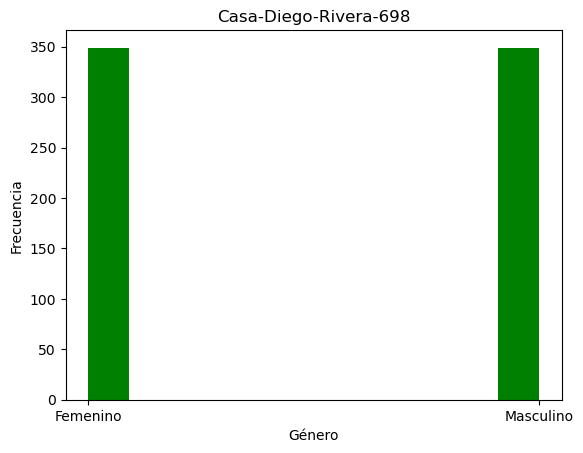

In [82]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[3]]["Género"].dropna(),bins="auto",color="green")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[3])
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

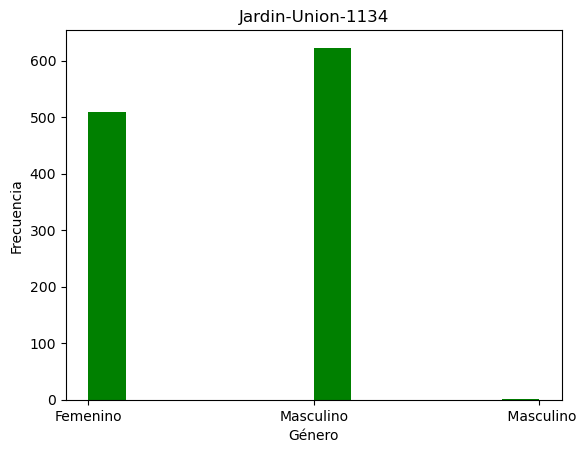

In [84]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[4]]["Género"].dropna(),bins="auto",color="green")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[4])
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

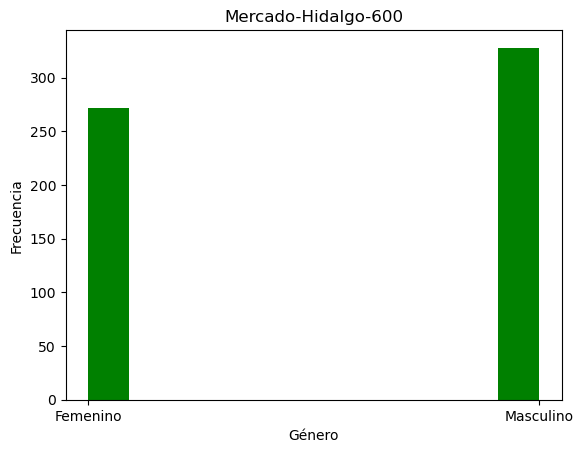

In [86]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[5]]["Género"].dropna(),bins="auto",color="green")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[5])
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

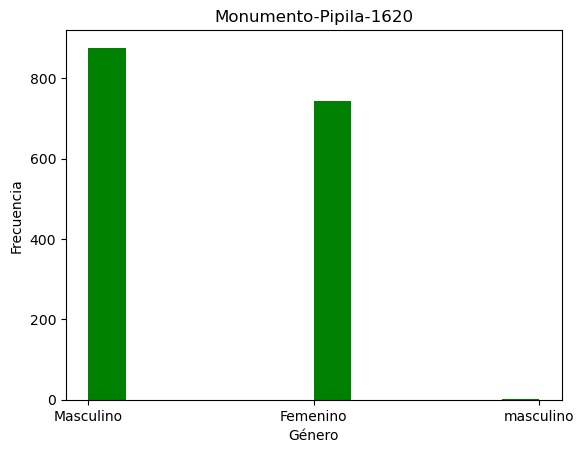

In [545]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[6]]["Género"].dropna(),bins="auto",color="green")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[6])
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

In [91]:
set(dataframes[nombre_lugares[6]]["Género"].dropna())

{'Femenino', 'Masculino', 'masculino'}

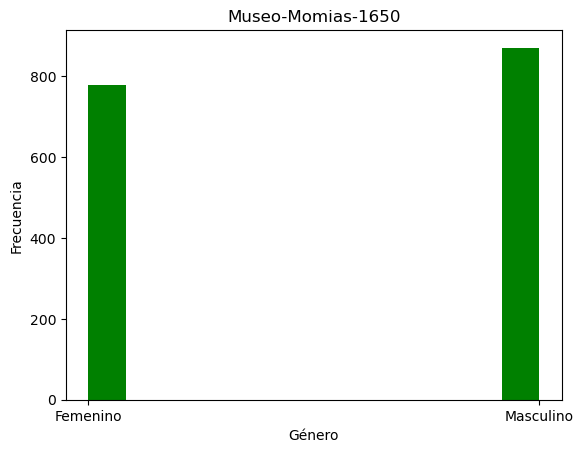

In [88]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[7]]["Género"].dropna(),bins="auto",color="green")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[7])
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

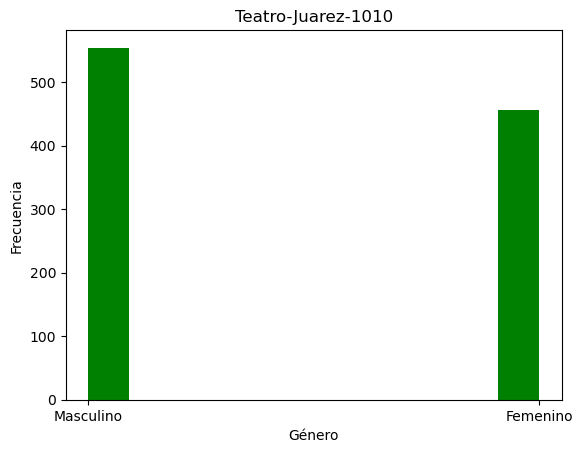

In [89]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[8]]["Género"].dropna(),bins="auto",color="green")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[8])
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

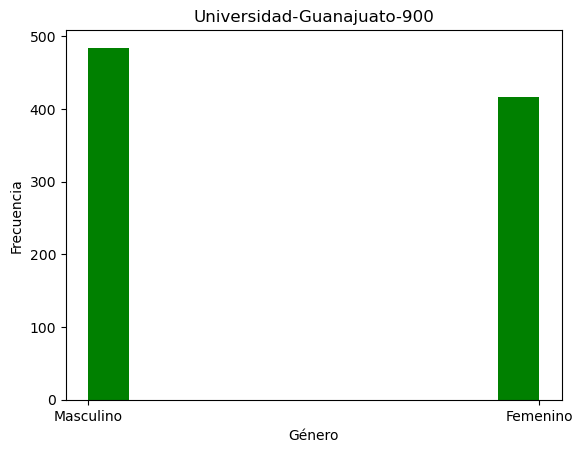

In [90]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[9]]["Género"].dropna(),bins="auto",color="green")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[9])
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

Haremos un análisis sobre los idiomas que hablan las personas que visitan los centros turísticos

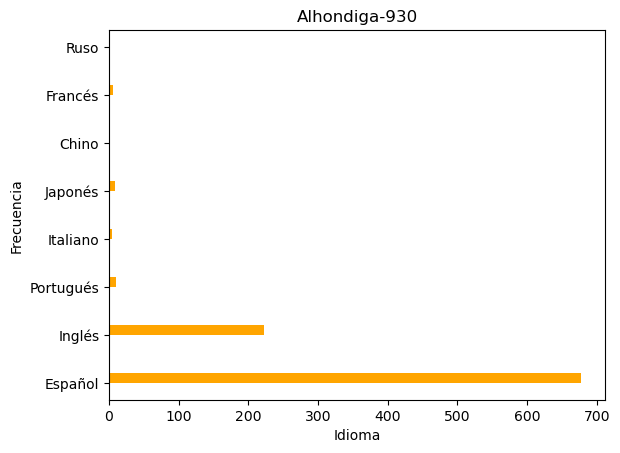

In [105]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[0]]["Idioma"].dropna(),bins="auto",color="orange",orientation="horizontal")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[0])
plt.xlabel("Idioma")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

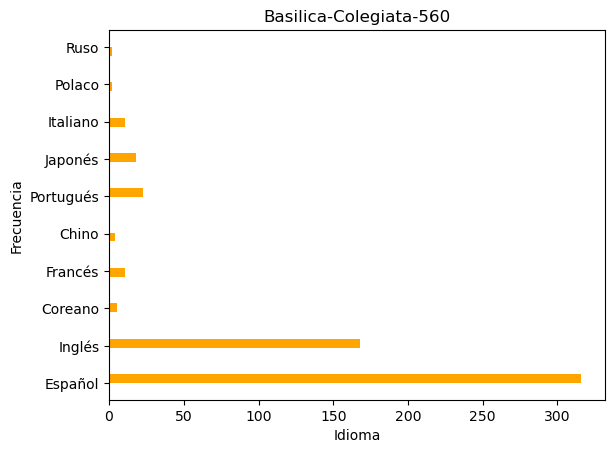

In [106]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[1]]["Idioma"].dropna(),bins="auto",color="orange",orientation="horizontal")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[1])
plt.xlabel("Idioma")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

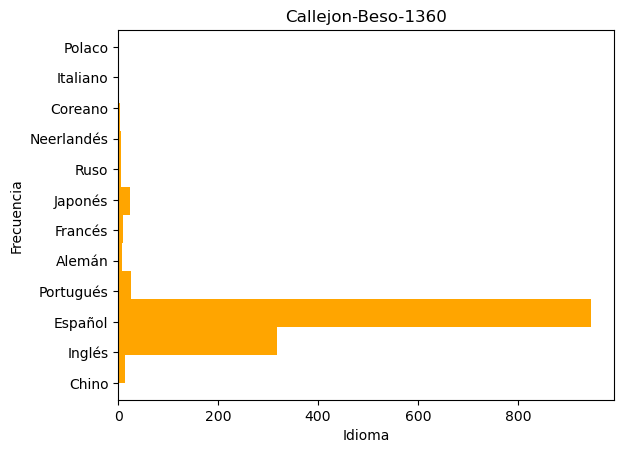

In [107]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[2]]["Idioma"].dropna(),bins="auto",color="orange",orientation="horizontal")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[2])
plt.xlabel("Idioma")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

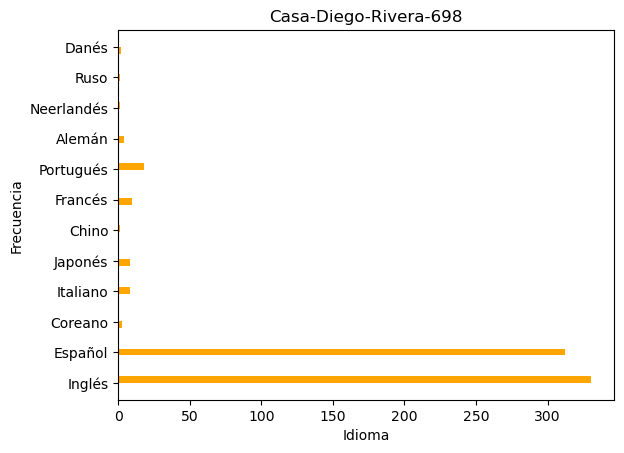

In [108]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[3]]["Idioma"].dropna(),bins="auto",color="orange",orientation="horizontal")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[3])
plt.xlabel("Idioma")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

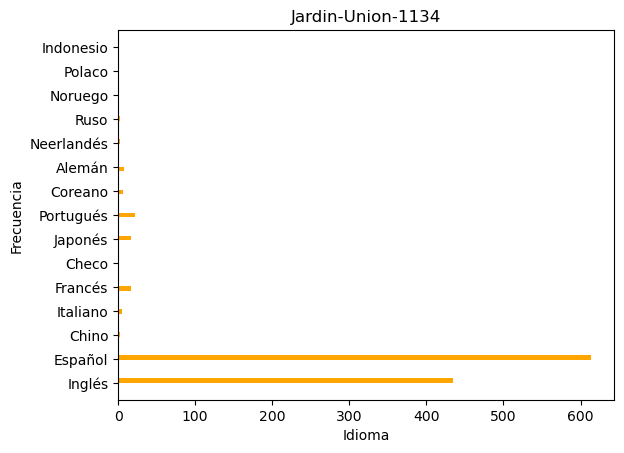

In [109]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[4]]["Idioma"].dropna(),bins="auto",color="orange",orientation="horizontal")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[4])
plt.xlabel("Idioma")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

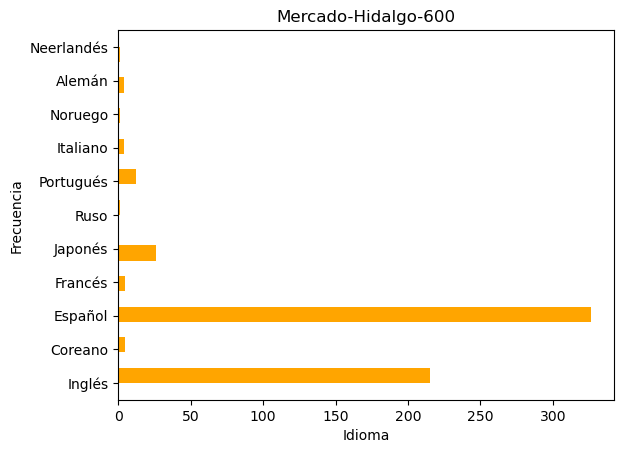

In [110]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[5]]["Idioma"].dropna(),bins="auto",color="orange",orientation="horizontal")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[5])
plt.xlabel("Idioma")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

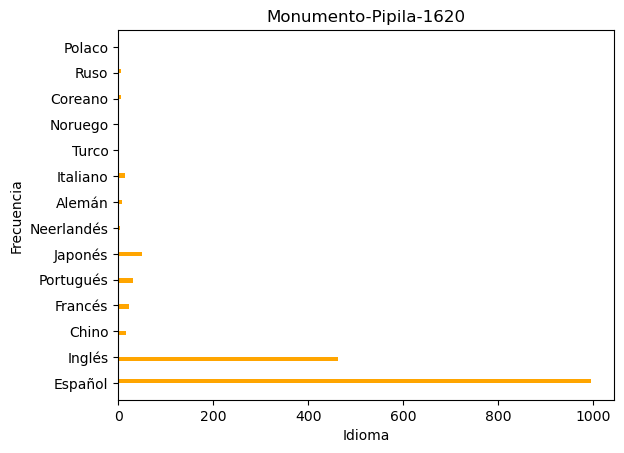

In [111]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[6]]["Idioma"].dropna(),bins="auto",color="orange",orientation="horizontal")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[6])
plt.xlabel("Idioma")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

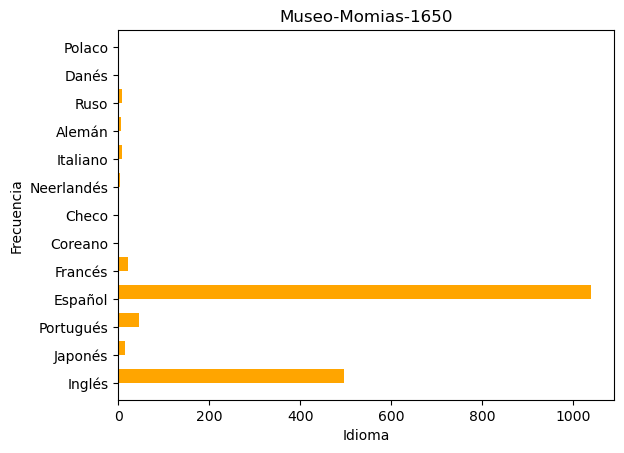

In [112]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[7]]["Idioma"].dropna(),bins="auto",color="orange",orientation="horizontal")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[7])
plt.xlabel("Idioma")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

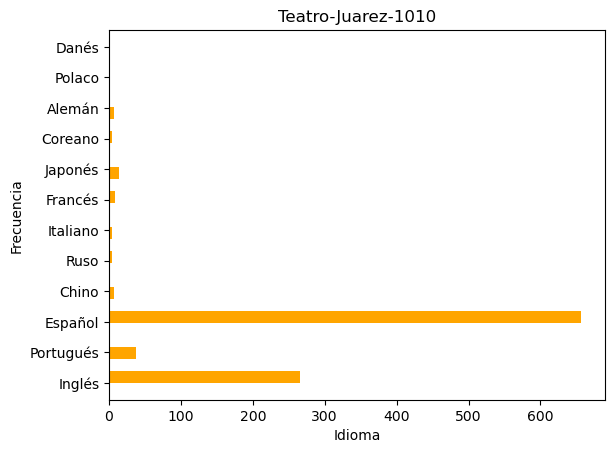

In [113]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[8]]["Idioma"].dropna(),bins="auto",color="orange",orientation="horizontal")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[8])
plt.xlabel("Idioma")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

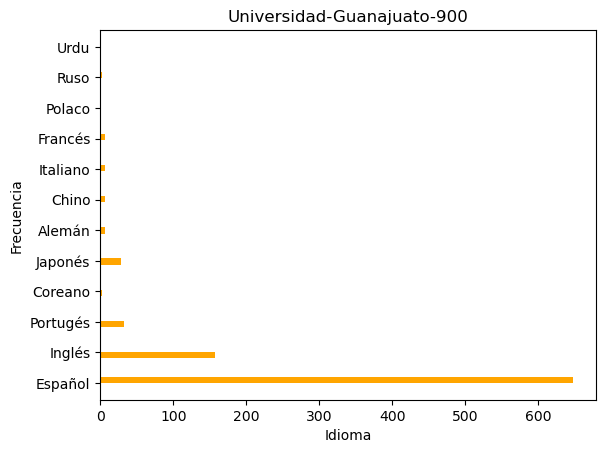

In [114]:
# Crear histograma
plt.hist(dataframes[nombre_lugares[9]]["Idioma"].dropna(),bins="auto",color="orange",orientation="horizontal")

# Agregar título y etiquetas de los ejes
plt.title(nombre_lugares[9])
plt.xlabel("Idioma")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

### 2. Utilizando una estrategia de feature selection (se sugiere X^2 o ganancia de información) visualice con word_cloud nubes de palabras el top k (se sugiere 50) de palabras más relevantes para cada uno de los 10 lugares. Note que serán 10 nubes, una por lugar.

Vamos a utilizar $chi^2$ como el criterio para seleccionar las 50 más relevantes.

In [310]:
final_stopwords_list = stopwords.words('english') + stopwords.words('spanish')

In [312]:
tfidf = TfidfVectorizer(stop_words=final_stopwords_list)

In [501]:
def procesar_opiniones(table):
    opinions = table['Opinión'].dropna()
    scale    = table['Escala'].dropna()

    tr_txt = []
    corpus_palabras = []
    for op in opinions:
        opinion = tk.tokenize(op.lower())
        tokens = [word for word in opinion if word.isalnum() and word not in stop_words and not word.isnumeric()] 

        corpus_palabras += tokens
        full_opinion = ' '.join(tokens)
        tr_txt.append(full_opinion)

    # Obtengo clases de Opinión
    # positivo[2] : {4, 5}, neutro[1]  : {3}, negativo[0] : {2, 1}
    tr_y = [0 if value < 3 else 1 if value == 3 else 2 for value in scale]

    # Creo diccionario de frecuencias
    fdist = nltk.FreqDist(corpus_palabras)

    return tr_txt, tr_y, fdist

In [431]:
def word_cloud(tr_txt,tr_y,k=50):
    vectors       = tfidf.fit_transform(tr_txt)
    feature_names = tfidf.get_feature_names_out()
  # Para visualizar pesados
  # df            = pd.DataFrame(denselist, columns = feature_names)

  # Extraigo top k con chi2
    feats = SelectKBest(chi2, k = k)
    feats.fit(vectors, tr_y)
    best  = feats.get_support(indices = True)

    dict_best = dict()
    for index in best:
        dict_best[feature_names[index]] = feats.scores_[index]

    wc = WordCloud()
    wc.generate_from_frequencies(dict_best)
    plt.axis("off")
    plt.imshow(wc, interpolation = "bilinear")
    plt.show()

Alhondiga-930
930 opiniones encontradas.


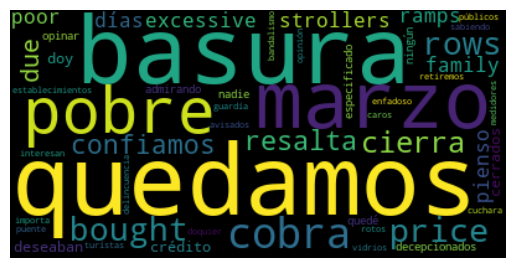

Basilica-Colegiata-560
560 opiniones encontradas.


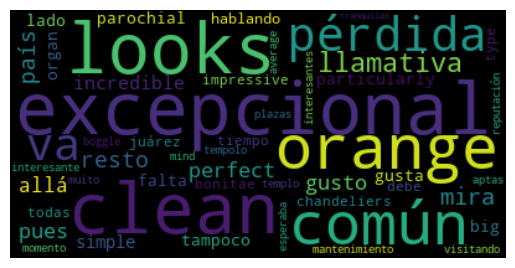

Callejon-Beso-1360
1360 opiniones encontradas.


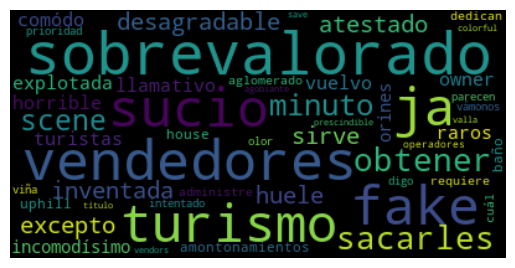

Casa-Diego-Rivera-698
698 opiniones encontradas.


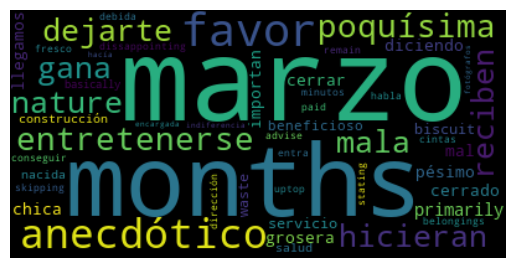

Jardin-Union-1134
1134 opiniones encontradas.


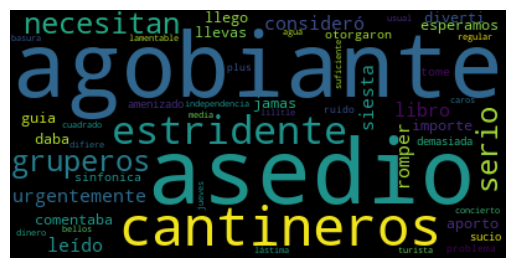

Mercado-Hidalgo-600
600 opiniones encontradas.


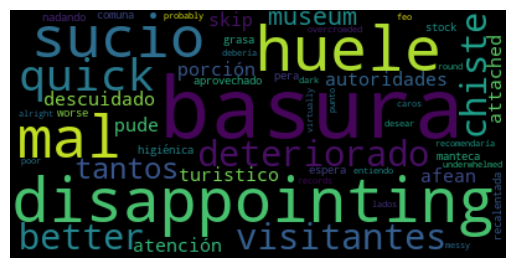

Monumento-Pipila-1620
1620 opiniones encontradas.


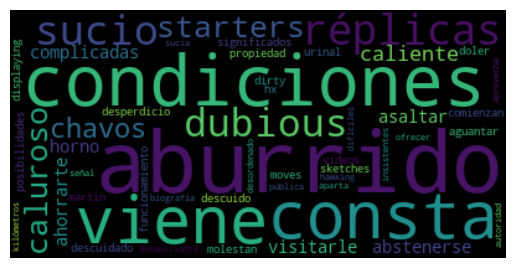

Museo-Momias-1650
1650 opiniones encontradas.


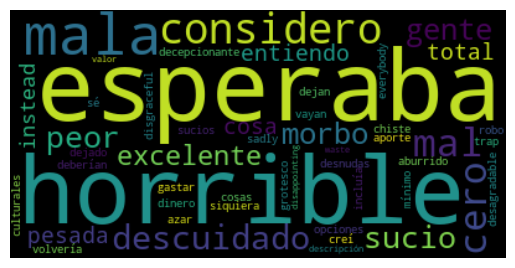

Teatro-Juarez-1010
1010 opiniones encontradas.


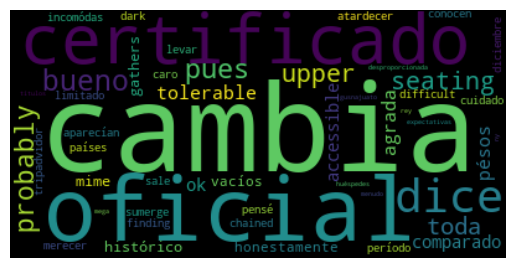

Universidad-Guanajuato-900
900 opiniones encontradas.


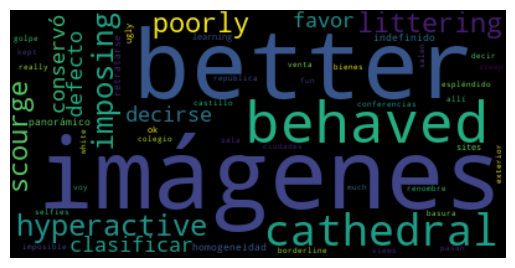

In [432]:
for place in nombre_lugares:
    print(place)
    tr_txt, tr_y, _ = procesar_opiniones(dataframes[place])
    word_cloud(tr_txt, tr_y, k = 50)

# 3. Para cada uno de los 10 sitios turísticos, haga un descubrimiento automático de los 3 tópicos con LSA (componentes principales) más relevantes y 10 palabras contenidas en cada tópico de cada uno de los siguientes subgrupos:

In [498]:
def procesar_opiniones_genero(table,genero):
    opinions = table['Opinión'].dropna()
    scale    = table['Escala'].dropna()
    gender = table['Género'].dropna()
    
    opinions = [opinions[i] for i, gender_ in enumerate(gender) if gender_.lower() == genero]
    scale    = [scale[i] for i, gender_ in enumerate(gender) if gender_.lower() == genero]

    tr_txt = []
    corpus_palabras = []
    for op in opinions:
        opinion = tk.tokenize(op.lower())
        tokens = [word for word in opinion if word.isalnum() and word not in stop_words and not word.isnumeric()] 

        corpus_palabras += tokens
        full_opinion = ' '.join(tokens)
        tr_txt.append(full_opinion)

    # positivo[2] : {4, 5}, neutro[1]  : {3}, negativo[0] : {2, 1}
    tr_y = [0 if value < 3 else 1 if value == 3 else 2 for value in scale]

    return tr_txt, tr_y

In [499]:
def procesar_opiniones_nacionalidad(table,nacionalidad):
    opinions = table['Opinión'].dropna()
    scale    = table['Escala'].dropna()
    nacionality = table['Nacional ó Internacional'].dropna()
    
    opinions = [opinions[i] for i, nacion_ in enumerate(nacionality) if nacion_.lower() == nacionalidad]
    scale    = [scale[i] for i, nacion_ in enumerate(nacionality) if nacion_.lower() == nacionalidad]

    tr_txt = []
    corpus_palabras = []
    for op in opinions:
        opinion = tk.tokenize(op.lower())
        tokens = [word for word in opinion if word.isalnum() and word not in stop_words and not word.isnumeric()] 

        corpus_palabras += tokens
        full_opinion = ' '.join(tokens)
        tr_txt.append(full_opinion)

    # positivo[2] : {4, 5}, neutro[1]  : {3}, negativo[0] : {2, 1}
    tr_y = [0 if value < 3 else 1 if value == 3 else 2 for value in scale]

    return tr_txt, tr_y

In [375]:
def procesar_opiniones_edad(table, age = 40.0, older = True):
    opinions = table['Opinión'].dropna()
    scale    = table['Escala'].dropna()
    edad = table['Edad'].dropna()
    
    get_ages = []
    for age_ in edad:
        if older :
            if age_ > age :
                get_ages.append(True)
            else:
                get_ages.append(False)
        else:
            if age_ <= age :
                get_ages.append(True)
            else :
                get_ages.append(False)
                
    opinions = [opinions[i] for i, age_ in enumerate(get_ages) if age_]
    scale    = [scale[i] for i, age_ in enumerate(get_ages) if age_]

    tr_txt = []
    corpus_palabras = []
    for op in opinions:
        opinion = tk.tokenize(op.lower())
        tokens = [word for word in opinion if word.isalnum() and word not in stop_words and not word.isnumeric()] 

        corpus_palabras += tokens
        full_opinion = ' '.join(tokens)
        tr_txt.append(full_opinion)

    # positivo[2] : {4, 5}, neutro[1]  : {3}, negativo[0] : {2, 1}
    tr_y = [0 if value < 3 else 1 if value == 3 else 2 for value in scale]

    return tr_txt, tr_y

In [359]:
def top_topics_lsa (tr_txt, topics = 3, words = 10):
    vectors      = tfidf.fit_transform(tr_txt)
    dictionary   = tfidf.get_feature_names_out()
  
    svd = TruncatedSVD(n_components = topics)
    lsa = svd.fit_transform(vectors)

    # Aggreglo de strings para tablas
    columns = ['topic_' + str(i+1) for i in range(topics)]

    topic_encoded_df = pd.DataFrame(lsa, columns = columns)
    topic_encoded_df['body'] = tr_txt
 
    encoding_matrix = pd.DataFrame(svd.components_,index = columns,columns = dictionary).T

    columns_abs = ['abs_topic_' + str(i+1) for i in range(topics)]

    for i, topic in enumerate(columns_abs) :
        encoding_matrix[topic] = np.abs(encoding_matrix['topic_' + str(i+1)])

    table_sorted1 = encoding_matrix.sort_values('abs_topic_1', ascending = False)[:words]
    table_sorted2 = encoding_matrix.sort_values('abs_topic_2', ascending = False)[:words]
    table_sorted3 = encoding_matrix.sort_values('abs_topic_3', ascending = False)[:words]
    
    t1 = table_sorted1.T.columns[:words].tolist()
    t2 = table_sorted2.T.columns[:words].tolist()
    t3 = table_sorted3.T.columns[:words].tolist()
    
    return t1,t2,t3

# (a) Hombres

In [368]:
for place in nombre_lugares:
    print("\n")
    print(place)
    tr_txt, _ = procesar_opiniones_genero(dataframes[place],'masculino')
    print("\n")
    t1,t2,t3 = top_topics_lsa(tr_txt, topics = 3, words = 10)
    print("Topic 1:")
    print(t1)
    print("Topic 2:")
    print(t2)
    print("Topic 3:")
    print(t3)



Alhondiga-930
930 opiniones encontradas.


Topic 1:
['historia', 'lugar', 'méxico', 'independencia', 'museo', 'guanajuato', 'si', 'visitar', 'visita', 'bien']
Topic 2:
['history', 'mexican', 'museum', 'place', 'independence', 'building', 'spanish', 'great', 'well', 'murals']
Topic 3:
['lugar', 'museo', 'visitar', 'edificio', 'independencia', 'historia', 'interesante', 'lleno', 'histórico', 'ciudad']


Basilica-Colegiata-560
560 opiniones encontradas.


Topic 1:
['guanajuato', 'ciudad', 'iglesia', 'centro', 'noche', 'lugar', 'basílica', 'hermosa', 'bonita', 'visitar']
Topic 2:
['beautiful', 'church', 'one', 'inside', 'basilica', 'city', 'see', 'great', 'town', 'visit']
Topic 3:
['noche', 'bonita', 'guanajuato', 'lugar', 'dentro', 'visita', 'hermosa', 'pena', 'vale', 'iglesia']


Callejon-Beso-1360
1360 opiniones encontradas.


Topic 1:
['lugar', 'callejón', 'beso', 'si', 'historia', 'guanajuato', 'pareja', 'leyenda', 'foto', 'ir']
Topic 2:
['alley', 'kiss', 'one', 'story', 'place', 't

# (b) Mujeres

In [366]:
for place in nombre_lugares:
    print("\n")
    print(place)
    tr_txt, _ = procesar_opiniones_genero(dataframes[place],'femenino')
    print("\n")
    t1,t2,t3 = top_topics_lsa(tr_txt, topics = 3, words = 10)
    print("Topic 1:")
    print(t1)
    print("Topic 2:")
    print(t2)
    print("Topic 3:")
    print(t3)



Alhondiga-930
930 opiniones encontradas.


Topic 1:
['historia', 'lugar', 'museo', 'méxico', 'guanajuato', 'independencia', 'conocer', 'si', 'visitar', 'edificio']
Topic 2:
['history', 'museum', 'mexican', 'building', 'spanish', 'place', 'well', 'interesting', 'visit', 'independence']
Topic 3:
['lugar', 'conocer', 'museo', 'edificio', 'salas', 'bien', 'historia', 'murales', 'parte', 'guanajuato']


Basilica-Colegiata-560
560 opiniones encontradas.


Topic 1:
['ciudad', 'guanajuato', 'hermosa', 'iglesia', 'basílica', 'centro', 'dentro', 'noche', 'bonita', 'arquitectura']
Topic 2:
['beautiful', 'inside', 'church', 'basilica', 'see', 'guanajuato', 'city', 'visit', 'amazing', 'night']
Topic 3:
['lugar', 'bonita', 'dentro', 'hermoso', 'historia', 'bien', 'conservada', 'pena', 'vale', 'vista']


Callejon-Beso-1360
1360 opiniones encontradas.


Topic 1:
['lugar', 'callejón', 'si', 'beso', 'foto', 'guanajuato', 'pareja', 'historia', 'leyenda', 'ir']
Topic 2:
['kiss', 'alley', 'story', 'go', 

# (c) Turistas nacionales

In [364]:
for place in nombre_lugares:
    print("\n")
    print(place)
    tr_txt, _ = procesar_opiniones_nacionalidad(dataframes[place],'nacional')
    print("\n")
    t1,t2,t3 = top_topics_lsa(tr_txt, topics = 3, words = 10)
    print("Topic 1:")
    print(t1)
    print("Topic 2:")
    print(t2)
    print("Topic 3:")
    print(t3)



Alhondiga-930
930 opiniones encontradas.


Topic 1:
['historia', 'lugar', 'museo', 'méxico', 'independencia', 'guanajuato', 'si', 'visitar', 'visita', 'bien']
Topic 2:
['lugar', 'pena', 'vale', 'museo', 'historia', 'conocer', 'méxico', 'edificio', 'si', 'murales']
Topic 3:
['independencia', 'si', 'méxico', 'bien', 'guanajuato', 'lugar', 'museo', 'ir', 'edificio', 'vas']


Basilica-Colegiata-560
560 opiniones encontradas.


Topic 1:
['guanajuato', 'ciudad', 'hermosa', 'lugar', 'centro', 'basílica', 'bonita', 'iglesia', 'arquitectura', 'noche']
Topic 2:
['bonita', 'lugar', 'guanajuato', 'dentro', 'hermoso', 'vale', 'pena', 'conocer', 'arquitectura', 'hermosa']
Topic 3:
['hermosa', 'ciudad', 'guanajuato', 'centro', 'bonita', 'noche', 'pena', 'si', 'bien', 'vale']


Callejon-Beso-1360
1360 opiniones encontradas.


Topic 1:
['lugar', 'callejón', 'beso', 'si', 'pareja', 'guanajuato', 'historia', 'foto', 'leyenda', 'ir']
Topic 2:
['lugar', 'beso', 'callejón', 'escalón', 'gente', 'tercer', '

# (d) Internacional

In [369]:
for place in nombre_lugares:
    print("\n")
    print(place)
    tr_txt, _ = procesar_opiniones_nacionalidad(dataframes[place],'internacional')
    print("\n")
    t1,t2,t3 = top_topics_lsa(tr_txt, topics = 3, words = 10)
    print("Topic 1:")
    print(t1)
    print("Topic 2:")
    print(t2)
    print("Topic 3:")
    print(t3)



Alhondiga-930
930 opiniones encontradas.


Topic 1:
['history', 'mexican', 'museum', 'building', 'place', 'spanish', 'independence', 'well', 'great', 'murals']
Topic 2:
['historia', 'lugar', 'méxico', 'museo', 'independencia', 'guanajuato', 'edificio', 'conocer', 'ciudad', 'bien']
Topic 3:
['place', 'history', 'learn', 'really', 'see', 'art', 'independence', 'museum', 'building', 'much']


Basilica-Colegiata-560
560 opiniones encontradas.


Topic 1:
['beautiful', 'guanajuato', 'inside', 'basilica', 'church', 'city', 'one', 'see', 'visit', 'around']
Topic 2:
['ciudad', 'iglesia', 'noche', 'centro', 'hermosa', 'basílica', 'amarillo', 'día', 'dentro', 'plaza']
Topic 3:
['noche', 'día', 'iluminación', 'color', 'iglesias', 'bella', 'pena', 'vale', 'amarillo', 'ciudad']


Callejon-Beso-1360
1360 opiniones encontradas.


Topic 1:
['alley', 'kiss', 'story', 'guanajuato', 'one', 'take', 'place', 'go', 'beso', 'picture']
Topic 2:
['lugar', 'callejón', 'si', 'historia', 'beso', 'pareja', 'leyen

# (e) Jovenes

In [385]:
# Promedio de edades
mean_ages = []
for name in nombre_lugares:
    prom = np.mean(np.array(dataframes[name]["Edad"].dropna()))
    mean_ages.append(prom)

In [386]:
for i, place in enumerate(nombre_lugares):
    print("\n")
    print(place)
    tr_txt, _ = procesar_opiniones_edad(dataframes[place],mean_ages[i],older = False)
    print("\n")
    t1,t2,t3 = top_topics_lsa(tr_txt, topics = 3, words = 10)
    print("Topic 1:")
    print(t1)
    print("Topic 2:")
    print(t2)
    print("Topic 3:")
    print(t3)



Alhondiga-930


Topic 1:
['historia', 'lugar', 'museo', 'méxico', 'independencia', 'guanajuato', 'si', 'conocer', 'visitar', 'bien']
Topic 2:
['history', 'museum', 'mexican', 'independence', 'place', 'spanish', 'building', 'visit', 'well', 'interesting']
Topic 3:
['lugar', 'conocer', 'museo', 'si', 'edificio', 'salas', 'méxico', 'pena', 'visitar', 'murales']


Basilica-Colegiata-560


Topic 1:
['ciudad', 'guanajuato', 'basílica', 'lugar', 'iglesia', 'dentro', 'bonita', 'centro', 'hermosa', 'noche']
Topic 2:
['beautiful', 'church', 'inside', 'city', 'one', 'see', 'guanajuato', 'basilica', 'great', 'must']
Topic 3:
['bonita', 'lugar', 'dentro', 'basílica', 'historia', 'conservada', 'pena', 'hermoso', 'iglesia', 'vale']


Callejon-Beso-1360


Topic 1:
['lugar', 'callejón', 'beso', 'si', 'historia', 'pareja', 'guanajuato', 'leyenda', 'foto', 'ir']
Topic 2:
['story', 'kiss', 'alley', 'place', 'one', 'take', 'love', 'romantic', 'go', 'must']
Topic 3:
['beso', 'gente', 'escalón', 'foto', 'l

# (f) Mayores

In [387]:
for i, place in enumerate(nombre_lugares):
    print("\n")
    print(place)
    tr_txt, _ = procesar_opiniones_edad(dataframes[place],mean_ages[i],older = True)
    print("\n")
    t1,t2,t3 = top_topics_lsa(tr_txt, topics = 3, words = 10)
    print("Topic 1:")
    print(t1)
    print("Topic 2:")
    print(t2)
    print("Topic 3:")
    print(t3)



Alhondiga-930


Topic 1:
['lugar', 'historia', 'méxico', 'museo', 'independencia', 'guanajuato', 'visita', 'visitar', 'parte', 'bien']
Topic 2:
['history', 'museum', 'building', 'mexican', 'place', 'spanish', 'murals', 'well', 'mexico', 'independence']
Topic 3:
['lugar', 'museo', 'méxico', 'independencia', 'edificio', 'lleno', 'además', 'visitar', 'parte', 'salas']


Basilica-Colegiata-560


Topic 1:
['guanajuato', 'iglesia', 'hermosa', 'ciudad', 'noche', 'centro', 'basílica', 'plaza', 'bonita', 'lugar']
Topic 2:
['beautiful', 'basilica', 'inside', 'one', 'church', 'around', 'see', 'city', 'visit', 'night']
Topic 3:
['hermosa', 'noche', 'guanajuato', 'lugar', 'iluminada', 'visitarla', 'arquitectura', 'iglesias', 'templo', 'centro']


Callejon-Beso-1360


Topic 1:
['lugar', 'callejón', 'beso', 'si', 'guanajuato', 'historia', 'pareja', 'foto', 'leyenda', 'ir']
Topic 2:
['alley', 'kiss', 'story', 'one', 'go', 'take', 'place', 'picture', 'legend', 'visit']
Topic 3:
['lugar', 'beso', 'cal

# 4. Para cada uno de los 10 sitios turísticos, haga una nube de palabras que muestre las palabras más asociadas a sus opiniones negativas utilizando chi-cuadrada. Puede usar funciones de sklearn o hacerlo tal como en las diapositivas del autor Ricardo Baeza (diapositivas dónde está lo de información mutua).

In [474]:
def procesar_opiniones_negativas(table):
    opinions = table['Opinión'].dropna()
    scale    = table['Escala'].dropna()
    
    opinions = [opinions[i] for i, tipo in enumerate(scale) if tipo == 1 or tipo == 2 or tipo == 3]
    tr_y     = [tipo for tipo in scale if tipo == 1 or tipo == 2 or tipo == 3]

    tr_txt = []
    corpus_palabras = []
    for op in opinions:
        opinion = tk.tokenize(op.lower())
        tokens = [word for word in opinion if word.isalnum() and word not in stop_words and not word.isnumeric()] 

        corpus_palabras += tokens
        full_opinion = ' '.join(tokens)
        tr_txt.append(full_opinion)

    return tr_txt , tr_y

Alhondiga-930


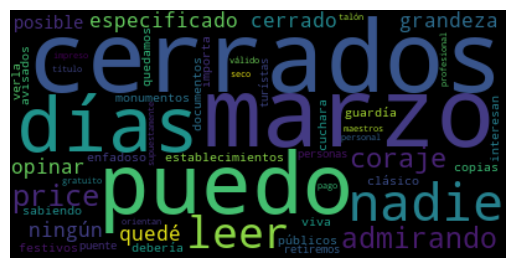

Basilica-Colegiata-560


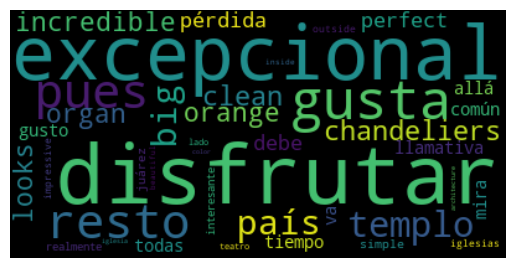

Callejon-Beso-1360


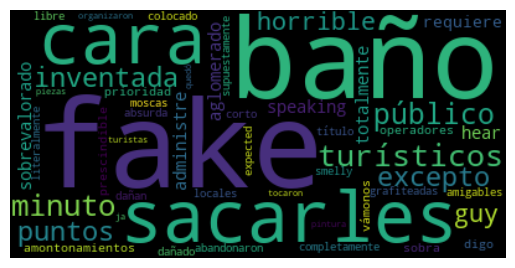

Casa-Diego-Rivera-698


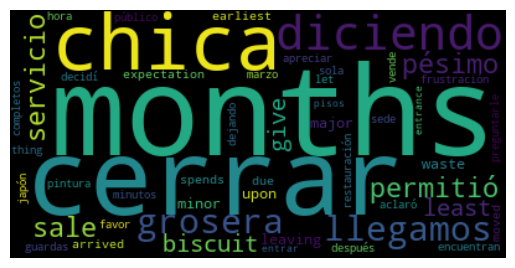

Jardin-Union-1134


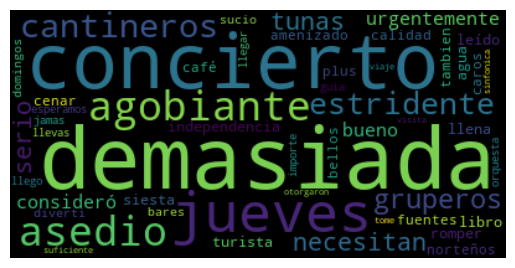

Mercado-Hidalgo-600


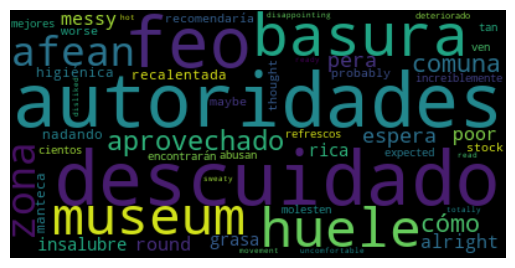

Monumento-Pipila-1620


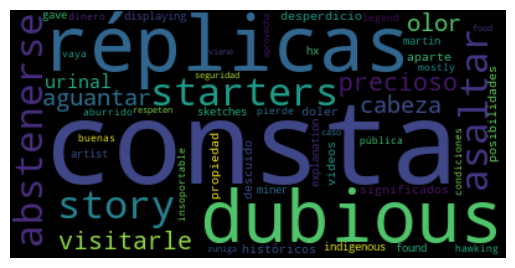

Museo-Momias-1650


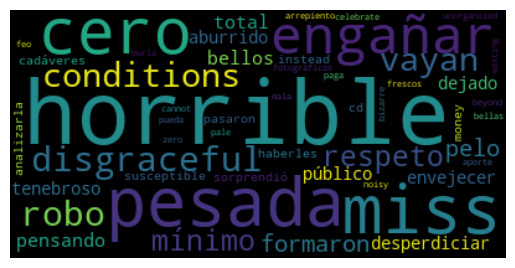

Teatro-Juarez-1010


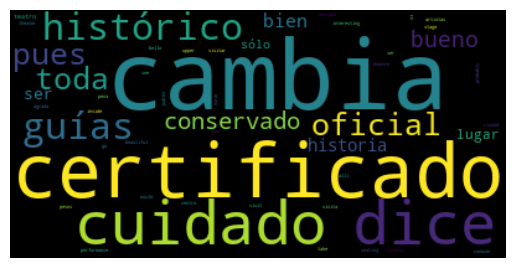

Universidad-Guanajuato-900


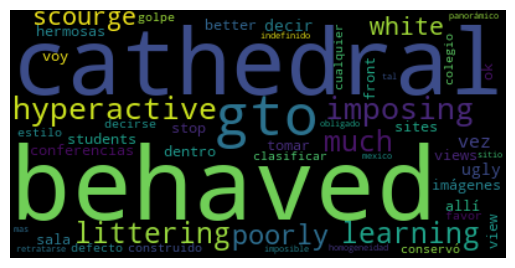

In [476]:
for place in nombre_lugares:
    print(place)
    tr_txt, tr_y = procesar_opiniones_negativas(dataframes[place])
    word_cloud(tr_txt, tr_y, k = 50)

# 5. Para cada uno de los 10 sitios turísticos construya tres Bolsas de Palabras de la siguiente manera: i) 1000 términos con mayor peso tfidf, ii) 2000 bigramas con mayor tfidf, y iii) 1000 trigramas con mayor tfidf. Luego concatene las tres representaciones que fueron calculadas de forma independiente, con sus propios tfidfs según su espacio y su propio L2. Finalmente sobre todo ese espacio concatenado de 4000 característi- cas aplique ganancia de información o X 2 y obtenga los 1000 features más relevantes. Muestre una nube de palabras con el top 50 features relevantes para cada lugar turístico.

In [491]:
def get_tfidf(tr_txt, ngram_range = (1,1), max_features = None):
    tfidf = TfidfVectorizer(stop_words = stop_words, ngram_range = ngram_range, max_features = max_features)
    vectors = tfidf.fit_transform(tr_txt)
    feature_names = tfidf.get_feature_names_out()
    
    return vectors.todense(), feature_names.tolist()

---------------------------------------------
Alhondiga-930
930 opiniones encontradas.
---------------------------------------------


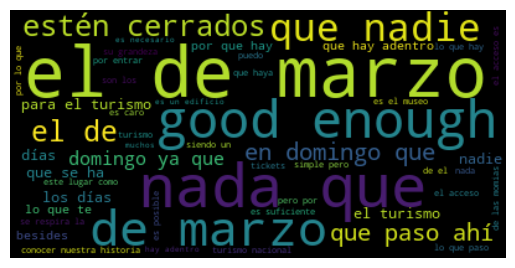

---------------------------------------------
Basilica-Colegiata-560
560 opiniones encontradas.
---------------------------------------------


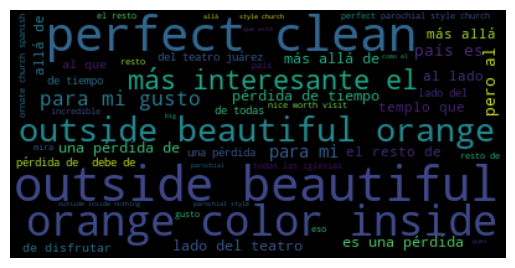

---------------------------------------------
Callejon-Beso-1360
1360 opiniones encontradas.
---------------------------------------------


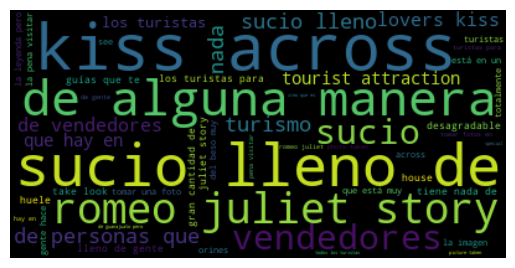

---------------------------------------------
Casa-Diego-Rivera-698
698 opiniones encontradas.
---------------------------------------------


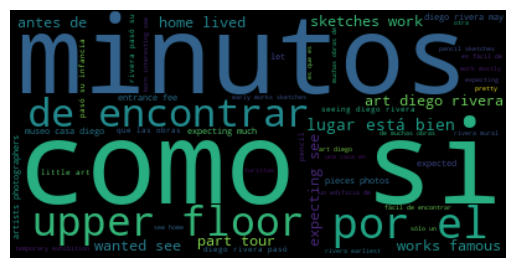

---------------------------------------------
Jardin-Union-1134
1134 opiniones encontradas.
---------------------------------------------


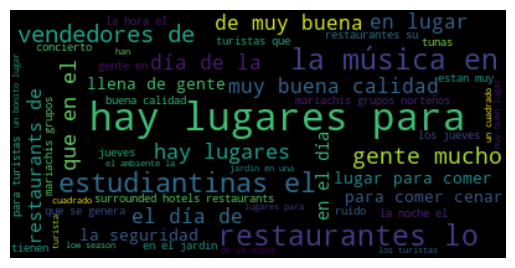

---------------------------------------------
Mercado-Hidalgo-600
600 opiniones encontradas.
---------------------------------------------


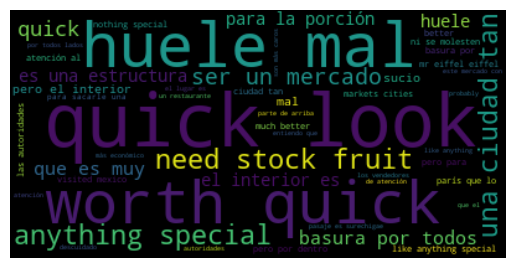

---------------------------------------------
Monumento-Pipila-1620
1620 opiniones encontradas.
---------------------------------------------


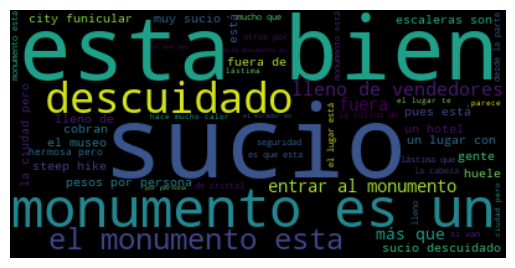

---------------------------------------------
Museo-Momias-1650
1650 opiniones encontradas.
---------------------------------------------


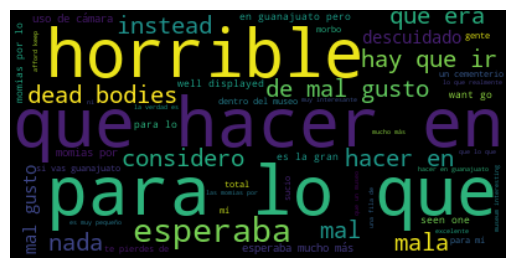

---------------------------------------------
Teatro-Juarez-1010
1010 opiniones encontradas.
---------------------------------------------


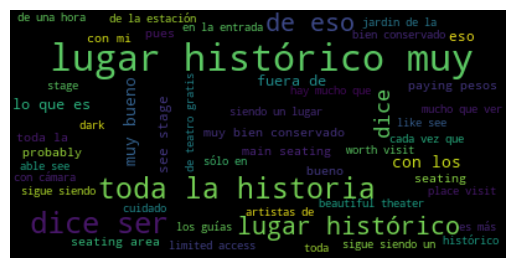

---------------------------------------------
Universidad-Guanajuato-900
900 opiniones encontradas.
---------------------------------------------


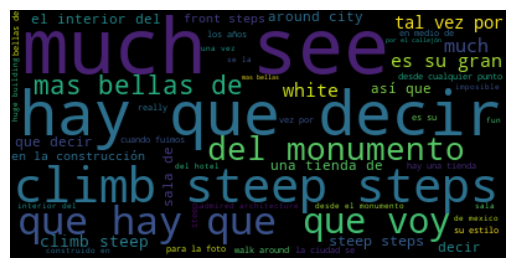

In [493]:
# Repito para cada lugar
for place in nombre_lugares:
    print('-' * 45)
    print(place)
    tr_txt, tr_y, _ = procesar_opiniones(dataframes[place])
    print('-' * 45)
    
    full_matrix     = []
    full_names      = []

  # 1000 términos con mayor peso tfidf
    vectors, feature_names = get_tfidf(tr_txt, max_features = 1000)
  # Agrego a matrix principal
    full_matrix = vectors
    full_names += feature_names

  # 2000 bigramas con mayor tfidf 
    vectors, feature_names = get_tfidf(tr_txt, ngram_range = (2,2), max_features = 2000)
  # Agrego a matrix principal
    full_matrix = np.concatenate((full_matrix, vectors), axis = 1)
    full_names += feature_names

  # 1000 trigramas con mayor tfidf
    vectors, feature_names = get_tfidf(tr_txt, ngram_range = (3,3), max_features = 1000)
  # Agrego a matrix principal
    full_matrix = np.concatenate((full_matrix, vectors), axis = 1)
    full_names += feature_names

  # Extraigo top k con chi2
    feats = SelectKBest(chi2, k = 1000)
    feats.fit(np.asarray(full_matrix), tr_y)
    best  = feats.get_support(indices = True)

  # Guardo solo cincuenta más relevante
    dict_best = dict()
    for index in best :
        dict_best[full_names[index]] = feats.scores_[index]

  # Ordeno con valores
    sorted_x = sorted(dict_best.items(), key = lambda item: item[1], reverse = True)

  # Creo diccionario de top 50
    dict_indices = dict()
    count = 0
    for word, value in sorted_x :
        dict_indices[word] = value
        count += 1
        if count == 50 :
            break

    wc = WordCloud()
    wc.generate_from_frequencies(dict_indices)
    plt.axis("off")
    plt.imshow(wc, interpolation = "bilinear")
    plt.show()

# (6) Muestre la ocurrencia temporal de las 10 palabras con más ganancia de información de TODO el dataset para cada sitio turístico. Aquí se sugiere usar la gráfica de estilo de los discursos de primer año de los presidentes en USA dada como ejemplo en NLTK. La idea sería tener una gráfica por sitio turístico y la ocurrencia marcada en azul del top 10 palabras de con mayor ganancia de información o chi en todo el dataset. Por ejemplo, si las 10 palabras con mayor ganancia de información en todo el dataset con respecto a las clases positivas, neutral y negativas son: w1, ...w10 entonces haga una gráfica de disperción temporal por lugar de como es la aparición de las palabras w1, ...w10 en cada sitio turistico.

In [518]:
def procesar_opiniones_fecha(table):
    opinions = table['Opinión'].dropna()
    dates    = table['Fecha'].dropna()
    
    tr_txt = [] 
    for op in opinions:
        opinion = tk.tokenize(op.lower())
        tokens = [word for word in opinion if word.isalnum() and word not in stop_words and not word.isnumeric()] 

        full_opinion = ' '.join(tokens)
        tr_txt.append(full_opinion)

    dates_sorted = sorted([[tr_txt[i], date] for i, date in enumerate(dates)], key = lambda item: item[1])
    
    tr_txt_sorted = []
    for text, date in dates_sorted :
        tr_txt_sorted.append(text)

    return tr_txt_sorted

In [519]:
# Obtengo texto y etiquetas de todo el dataset
full_text   = []
full_labels = []
for place in nombre_lugares:
    tr_txt, tr_y, _ = procesar_opiniones(dataframes[place])

    full_text   += tr_txt
    full_labels += tr_y

In [520]:
# Palabras más relevantes en todo el dataset
vectors, feature_names = get_tfidf(full_text)
feats = SelectKBest(chi2, k = 10)
feats.fit(np.asarray(vectors), full_labels)
best  = feats.get_support(indices = True)

top_10 = []
for index in best :
    top_10.append(feature_names[index])

Alhondiga-930


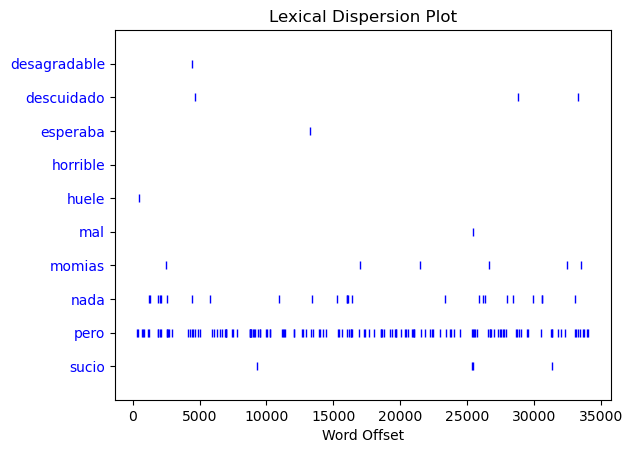

Basilica-Colegiata-560


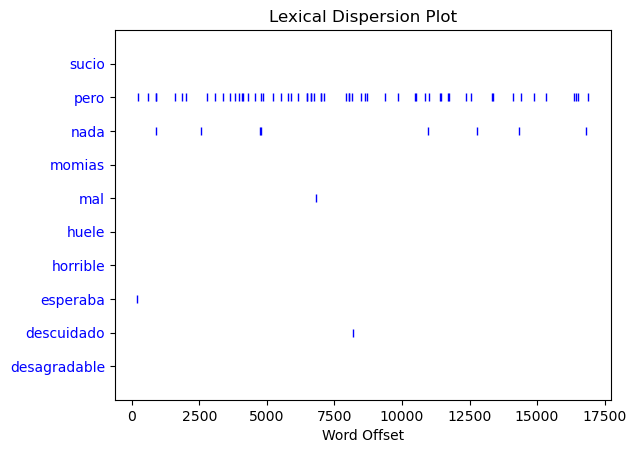

Callejon-Beso-1360


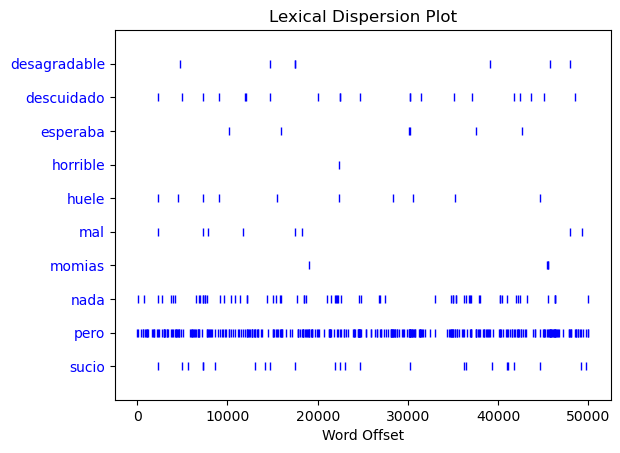

Casa-Diego-Rivera-698


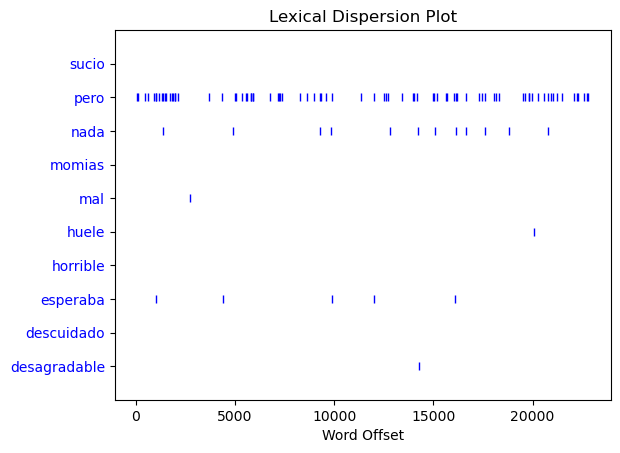

Jardin-Union-1134


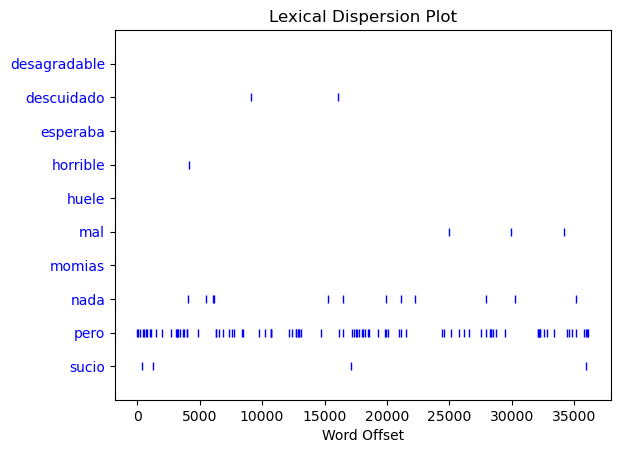

Mercado-Hidalgo-600


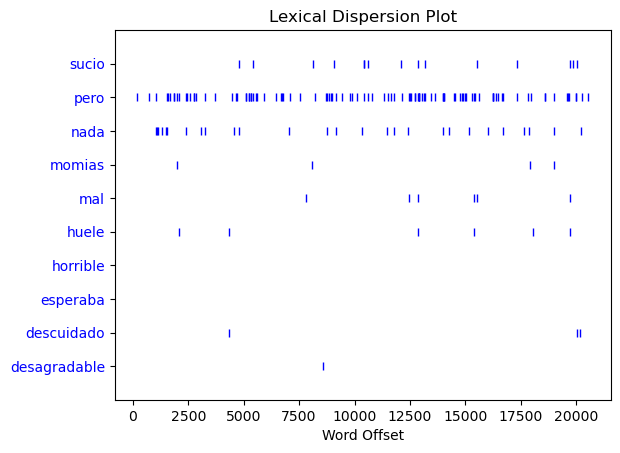

Monumento-Pipila-1620


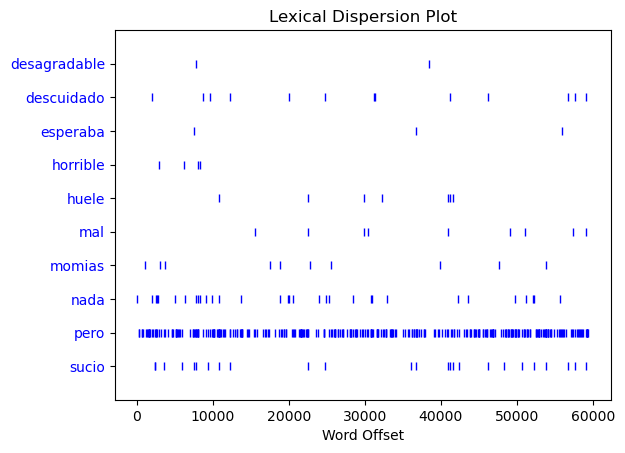

Museo-Momias-1650


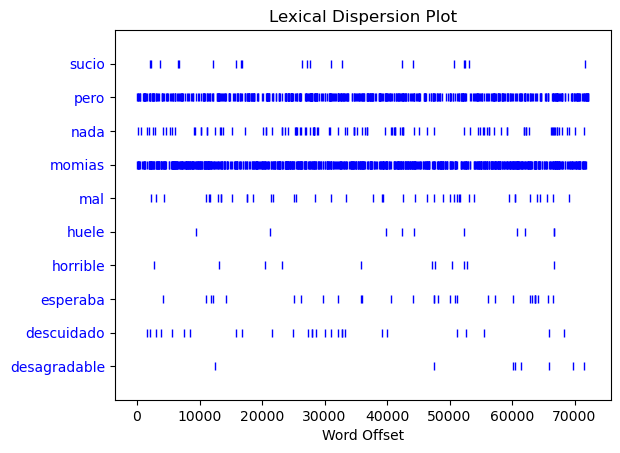

Teatro-Juarez-1010


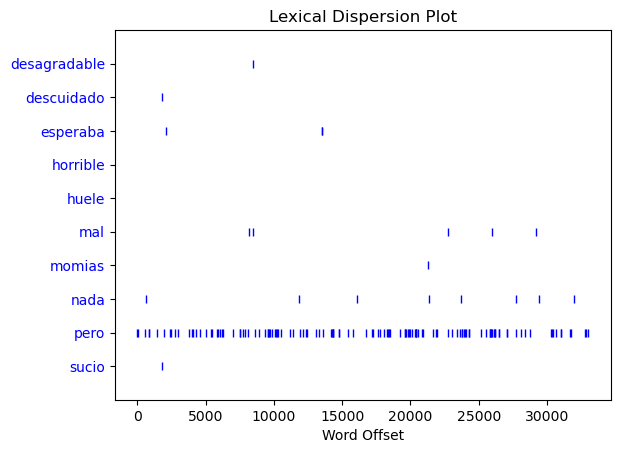

Universidad-Guanajuato-900


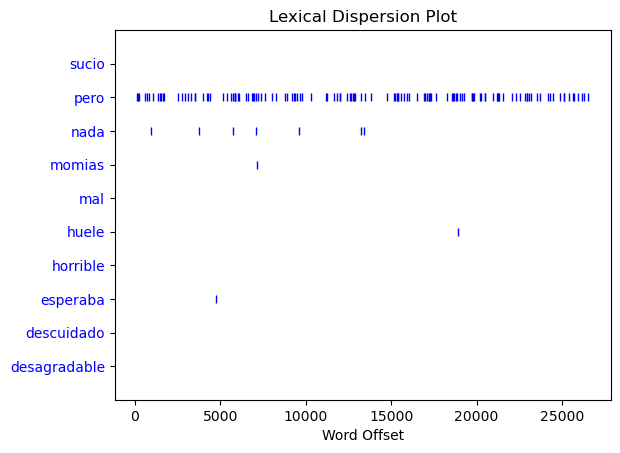

In [521]:
for place in nombre_lugares:
    tr_txt = procesar_opiniones_fecha(dataframes[place])
    
    tokens = tk.tokenize(" ".join(tr_txt))
    text   = nltk.Text(tokens)
    print(place)
    text.dispersion_plot(top_10)

# 7.Diseñe un análisis temporal (formato libre) que muestre opiniones positivas, negativas y neutras a través de los meses y años para todos los sitios turísticos. En pocas palabras mostrar la evolución de las opiniones a través del tiempo.

Alhondiga-930


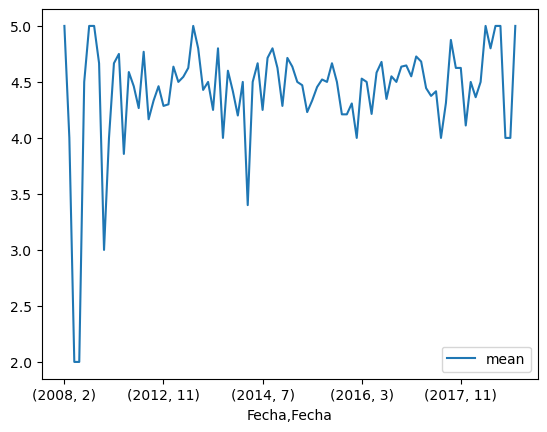

Basilica-Colegiata-560


C:\Users\ernes\AppData\Local\Temp\ipykernel_21924\799879550.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_group_ = subframe.astype({'Fecha': 'datetime64[ns]'})


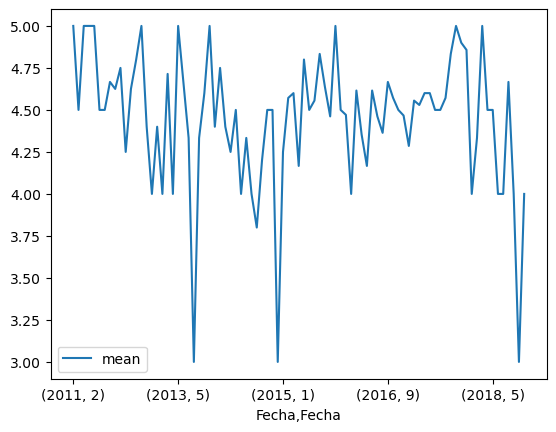

Callejon-Beso-1360


C:\Users\ernes\AppData\Local\Temp\ipykernel_21924\799879550.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_group_ = subframe.astype({'Fecha': 'datetime64[ns]'})


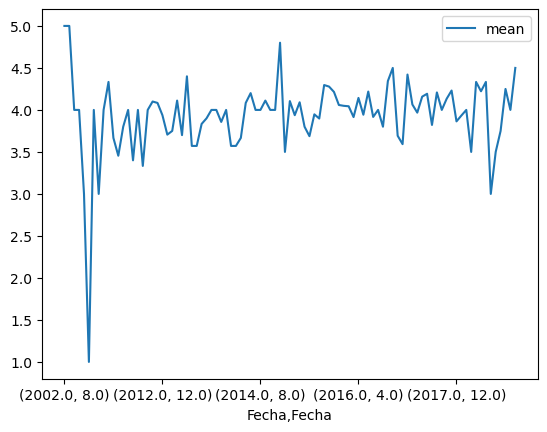

C:\Users\ernes\AppData\Local\Temp\ipykernel_21924\799879550.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_group_ = subframe.astype({'Fecha': 'datetime64[ns]'})


Casa-Diego-Rivera-698


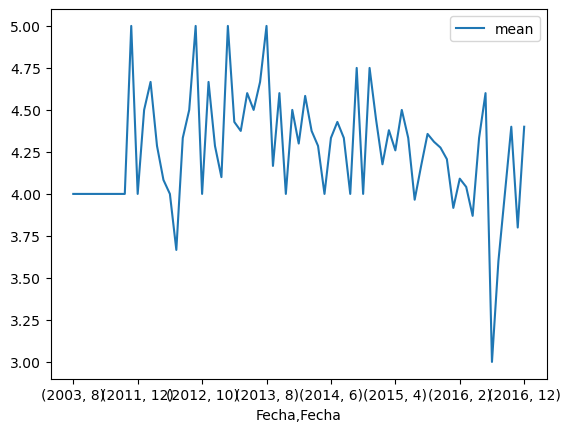

C:\Users\ernes\AppData\Local\Temp\ipykernel_21924\799879550.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_group_ = subframe.astype({'Fecha': 'datetime64[ns]'})


Jardin-Union-1134


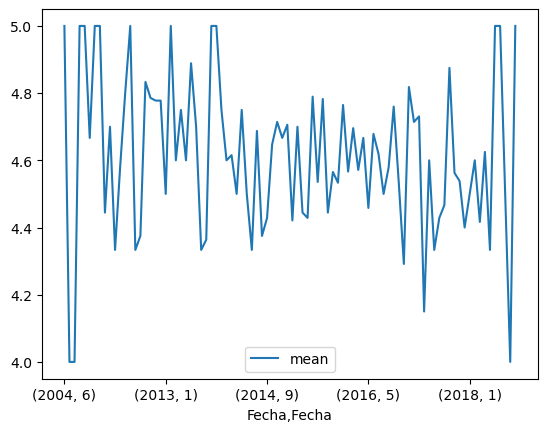

C:\Users\ernes\AppData\Local\Temp\ipykernel_21924\799879550.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_group_ = subframe.astype({'Fecha': 'datetime64[ns]'})


Mercado-Hidalgo-600


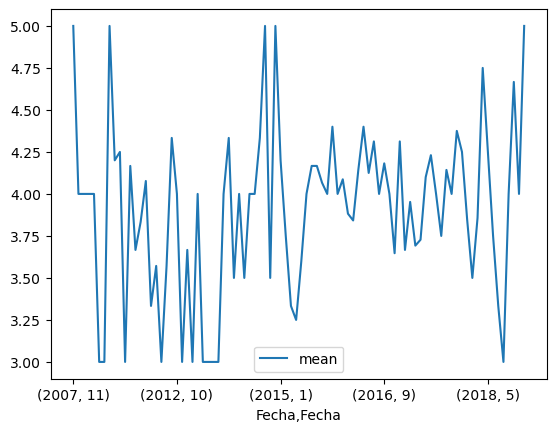

C:\Users\ernes\AppData\Local\Temp\ipykernel_21924\799879550.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_group_ = subframe.astype({'Fecha': 'datetime64[ns]'})


Monumento-Pipila-1620


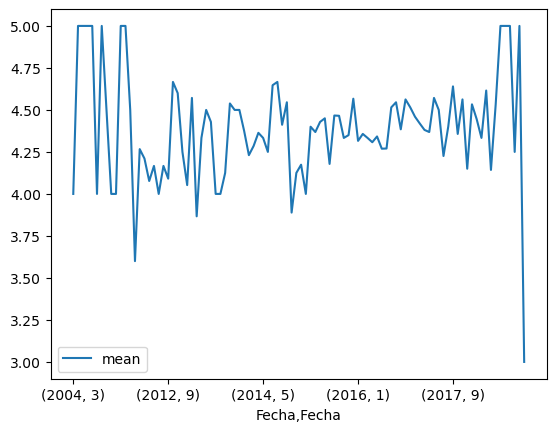

C:\Users\ernes\AppData\Local\Temp\ipykernel_21924\799879550.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_group_ = subframe.astype({'Fecha': 'datetime64[ns]'})


Museo-Momias-1650


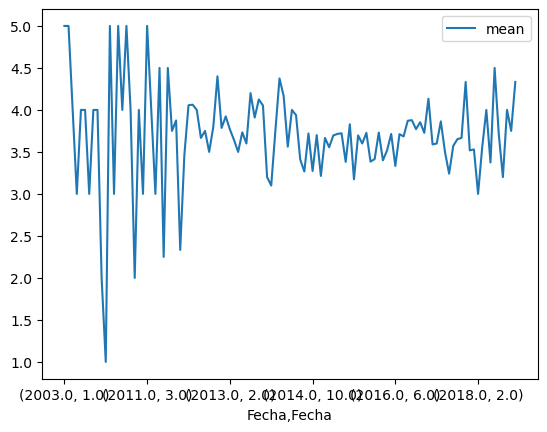

C:\Users\ernes\AppData\Local\Temp\ipykernel_21924\799879550.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_group_ = subframe.astype({'Fecha': 'datetime64[ns]'})


Teatro-Juarez-1010


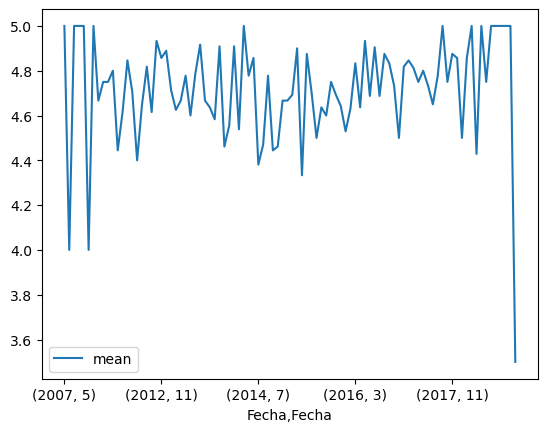

C:\Users\ernes\AppData\Local\Temp\ipykernel_21924\799879550.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_group_ = subframe.astype({'Fecha': 'datetime64[ns]'})


Universidad-Guanajuato-900


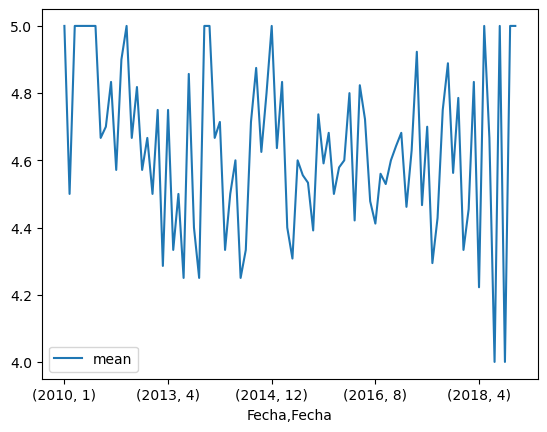

In [543]:
for place in nombre_lugares:
    print(place)
    subframe = dataframes[place][['Fecha', 'Escala']]

    df_group_ = subframe.astype({'Fecha': 'datetime64[ns]'})
    df_group_date = df_group_.groupby([df_group_['Fecha'].dt.year, df_group_['Fecha'].dt.month])
    df_group_date.agg({'mean'}).loc[:,"Escala"].plot()
    plt.show()

Como la pregunta dice que es formato libre realizamos lo siguiente. Puede que tengamos en una misma fecha varias opiniones, entonces tomé el promedio de todas las opiniones que ocurren en el mismo día. Luego, grafíque lo obtenido en el paso anterior con respecto a las fechas para poder observar como va subiendo y bajando el tipo de opiniones, entrando en una escala positiva, negativa o neutra. De lo anterior se puede ver perfectamente como fue desarrollo con respecto al tiempo.

# Preguntas: Conteste lo más detallado posible lo siguiente, dando argumentos y conclusiones claras según su análisis previo. Cada respuesta entre 150 (mínimo) y 300 (máximo) palabras.

### 1. ¿De los sitios turísticos, cual diría usted que es el más polémico y la razón de ello?

Como podemos notar del promedio de los scores de las opiniones, el Museo de las momias obtuvo el promedio más bajo. Además obtuvo el promedio de longitud de opiniones más grande por lo que junto con lo anterior, podría sugerirse que la gente se queja extensamente del lugar cuando lo hace. 

De igual forma se puede ver de las gráficas del último problema que siempre su gráfica del museo de las momias a través del tiempo se encuentra yendo hacia abajo o con valores pequeños indicando el disgusto con el lugar.

### 2. En cuanto al sitio más polémico, ¿Como es la diferencia de opinión y temas entre turistas nacionales e internacionales?

Por ejemplo la cantidad de visitantes extranjeros y nacionales del museo de las momias es casi la misma. También del análisis del problema 3 podemos ver que tanto nacionales como internacionales opinan que es un lugar interesante para visitar. Para ambas opinones de personas se reciben críticas como que el lugar es horrible, sucio y que te engañan. 

### 3.¿Cual diría que es el sitio que le gusta más a las mujeres y por qué?

In [553]:
for place in nombre_lugares:
    _, tr_y = procesar_opiniones_genero(dataframes[place],'femenino')
    print(place)
    print(np.mean(tr_y))

Alhondiga-930
1.8657074340527577
Basilica-Colegiata-560
1.9341563786008231
Callejon-Beso-1360
1.683284457478006
Casa-Diego-Rivera-698
1.813753581661891
Jardin-Union-1134
1.9392156862745098
Mercado-Hidalgo-600
1.6838235294117647
Monumento-Pipila-1620
1.8694481830417227
Museo-Momias-1650
1.44801026957638
Teatro-Juarez-1010
1.9780701754385965
Universidad-Guanajuato-900
1.9519230769230769


Recordemos que establecimos que 0 era negativo, 1 nuetro y 2 positivo. Entonces el que tiene el mejor promedio es el teatro juarez, por lo que ese es el que más les gusta a las mujeres.

### 4. ¿Cual diría que es el sitio que le gusta más a las personas jóvenes y por qué?

In [555]:
for place in nombre_lugares:
    _ , tr_y = procesar_opiniones_edad(dataframes[place],mean_ages[i], older = False)
    print(place)
    print(np.mean(tr_y))

Alhondiga-930
1.8656716417910448
Basilica-Colegiata-560
1.921259842519685
Callejon-Beso-1360
1.6708333333333334
Casa-Diego-Rivera-698
1.8162544169611308
Jardin-Union-1134
1.928421052631579
Mercado-Hidalgo-600
1.6583629893238434
Monumento-Pipila-1620
1.8427947598253276
Museo-Momias-1650
1.4742388758782201
Teatro-Juarez-1010
1.9762419006479481
Universidad-Guanajuato-900
1.9531914893617022


El que tiene el mejor promedio es el teatro juarez, por lo que será el mejor para los jóvenes.

### 5.¿Qué otras observaciones valiosas puede obtener de su análisis? (e.g., ¿identificó de que se queja la gente? ¿qué tipo de cosas le gustó a la gente?, etc.)

Con respecto a la prueba chi cuadrada sobre las 50 palabras más significativas para cada lugar podemos decir que la gente piensa lo siguiente de dichos lugares:

Alhondiga: Cobran un alto precio y es poco lo que se ve.
Basílica colegiata: Es un lugar excepcional y muy limpio. Muy bonita aruitectura.
Callejón del beso: está sucio y está sobrevalorado. Tiene muchos vendedores.
Casa diego rivera: Tiene muy pocas cosas y es aburrida.
Jardín unión: Es agobiante y solo tiene muchos bares.
Mercado Hidalgo: huele feo.
Pipila: es abburrido
momias: horrible
Universidad de gto: hermoso y bello